# <span style='font-family:"Times New Roman"'> <span styel=''>**PAN CANCER TMB PLOT**
*Emile Cohen*
    
 *May 2020*

**Goal:** In this notebook, we want to summarize Tumor Mutational Burden differences in subgroups across all cancers. For that we will plot the fraction of genome altered for each subgroup for eahc cancer.

---

In [124]:
%run -i '../../../utils/setup_environment.ipy'

import warnings
warnings.filterwarnings('ignore')
from cancer_utils import *
from scipy.stats import fisher_exact, ranksums, chi2, norm
from statsmodels.sandbox.stats.multicomp import multipletests
import matplotlib.gridspec as gridspec

data_path = '../../../data/'

Setup environment... done!


<span style="color:green">✅ Working on **mskimpact_env** conda environment.</span>

In [125]:
master_no_wgd = non_wgd_load_and_cut(data_path + 'impact-facets-tp53/processed/no_wgd/master_no_wgd.pkl')
master_wgd = pd.read_pickle(data_path + 'impact-facets-tp53/processed/wgd/master_wgd.pkl')

In [127]:
def boxplot_sampletype(df: pd.DataFrame, group:str, palette, order, metrics: str, figsize= (10,3), title: str = '', title_font: int=12, xlim=[0,1]):
    fig=plt.figure(figsize=figsize)
    ax = plt.subplot2grid(shape=(2,1), loc=(0,0), colspan=1)
    
    sns.boxplot(y=metrics, x=group,data=df,ax=ax, dodge=False,order=order, palette=palette).set_title(title, weight='bold', fontsize=title_font)

    style(ax)
    ax.set_ylim(xlim)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    return fig, ax

# Let's give a look at medians and statistics

def get_statistics(df: pd.DataFrame, group:str, metrics: str, group_list: list):
    group_1 = df[df[group] == group_list[0]][metrics]
    group_2 = df[df[group] == group_list[1]][metrics]

    median_1 = group_1.median()
    median_2 = group_2.median()

    statistic, p_value = ranksums(group_1.dropna().values,group_2.dropna().values)
    
    results = [['', 'size', metrics],
               [group_list[0], group_1.shape[0], median_1],
               [group_list[1], group_2.shape[0], median_2],
               ['', 'Statistics', 'p-value'],
               ['', statistic, p_value]]


    return pd.DataFrame(results)

# WGD COHORT

## LOH Status

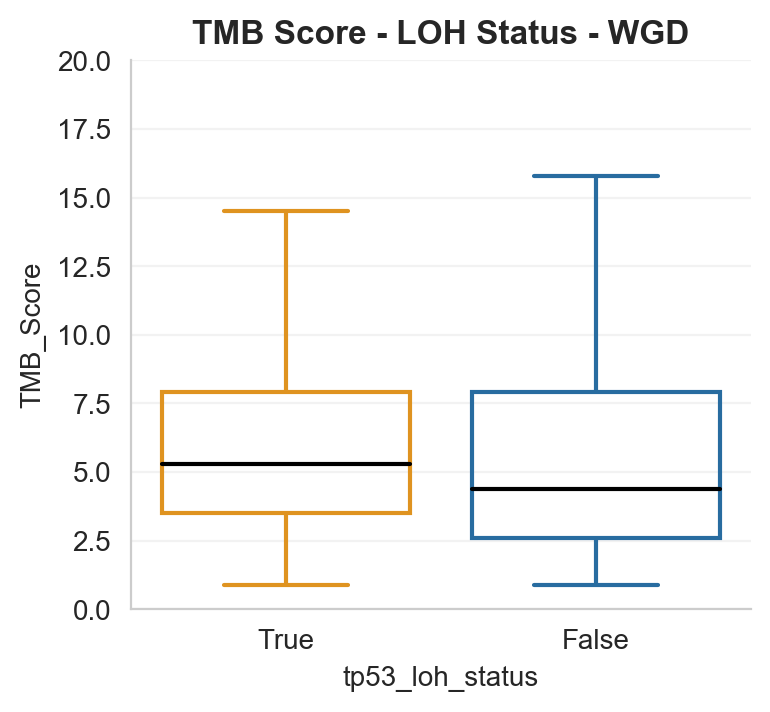

,0,1,2
0,,size,TMB_Score
1,True,4659,5.3
2,False,1708,4.4
3,,Statistics,p-value
4,,8.18137,2.80636e-16


In [105]:
fig, ax = boxplot_sampletype(df=master_wgd,
                  group='tp53_loh_status',
                  palette=palette_loh,
                  order=loh_list,
                  metrics='TMB_Score',
                  figsize=(4,8),
                  title='TMB Score - LOH Status - WGD',
                  xlim=[0,20])
plt.show()

display(get_statistics(df=master_wgd,
               group='tp53_loh_status',
               metrics='TMB_Score', 
               group_list=[True, False]))

## Pre WGD Allelic State

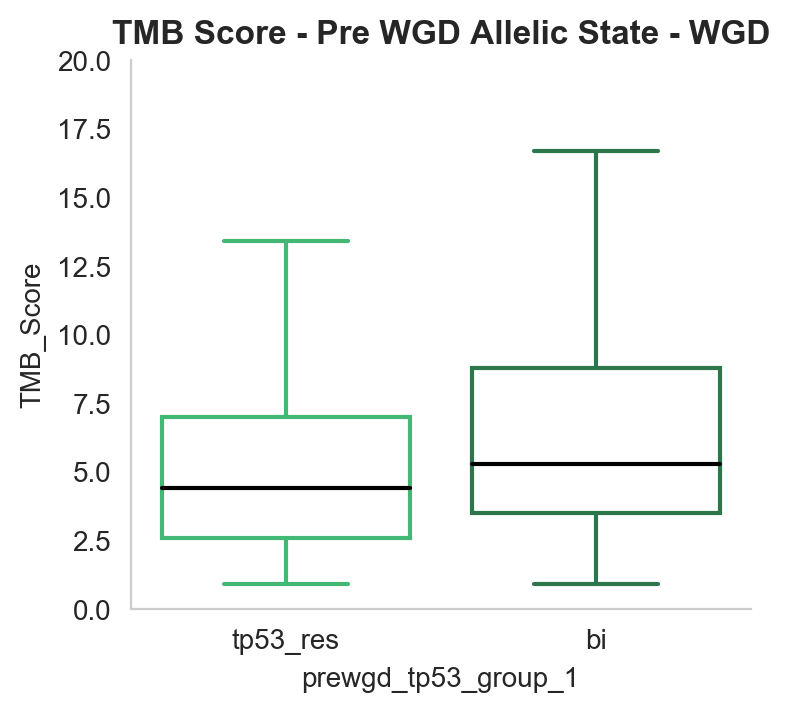

,0,1,2
0,,size,TMB_Score
1,tp53_res,2808,4.4
2,bi,3289,5.3
3,,Statistics,p-value
4,,-11.9711,5.03859e-33


In [112]:
fig, ax = boxplot_sampletype(df=master_wgd,
                  group='prewgd_tp53_group_1',
                  palette=palette_bi,
                  order=bi_list,
                  metrics='TMB_Score',
                  figsize=(4,8),
                  title='TMB Score - Pre WGD Allelic State - WGD',
                  xlim=[0,20])
plt.show()

display(get_statistics(df=master_wgd,
               group='prewgd_tp53_group_1',
               metrics='TMB_Score', 
               group_list=['tp53_res', 'bi']))

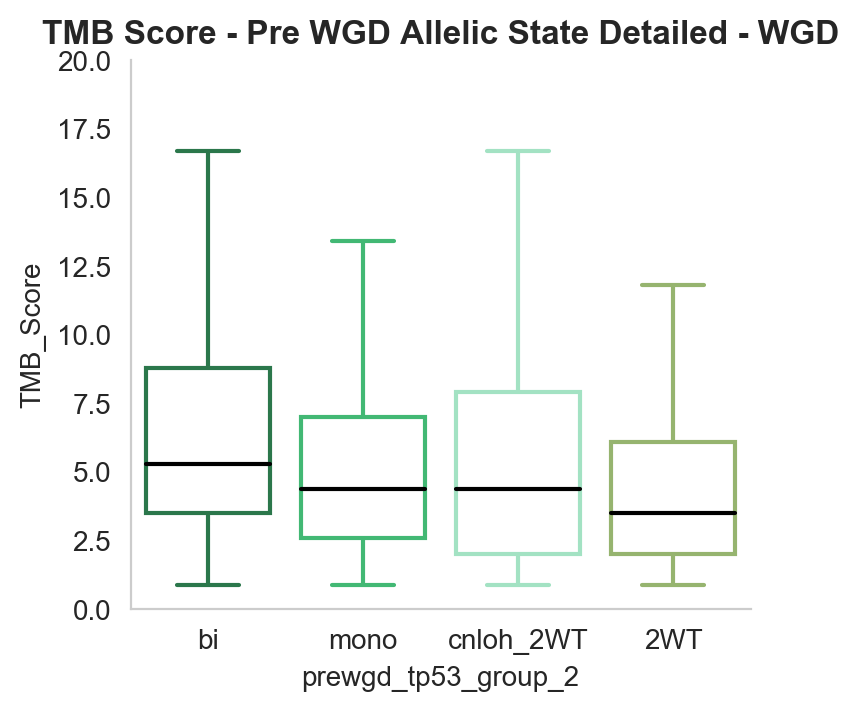

,0,1,2
0,,size,TMB_Score
1,bi,3289,5.3
2,mono,832,4.4
3,,Statistics,p-value
4,,7.64563,2.07926e-14
,0,1,2
0,,size,TMB_Score
1,mono,832,4.4
2,2WT,1306,3.5
3,,Statistics,p-value


In [148]:
fig, ax = boxplot_sampletype(df=master_wgd,
                  group='prewgd_tp53_group_2',
                  palette=palette_state,
                  order=state_list,
                  metrics='TMB_Score',
                  figsize=(4,8),
                  title='TMB Score - Pre WGD Allelic State Detailed - WGD',
                  xlim=[0,20])
plt.show()

display_side_by_side(get_statistics(df=master_wgd,
               group='prewgd_tp53_group_2',
               metrics='TMB_Score', 
               group_list=['bi', 'mono']),
                    
                    get_statistics(df=master_wgd,
               group='prewgd_tp53_group_2',
               metrics='TMB_Score', 
               group_list=['mono', '2WT']))

# Non WGD Cohort

## LOH Status

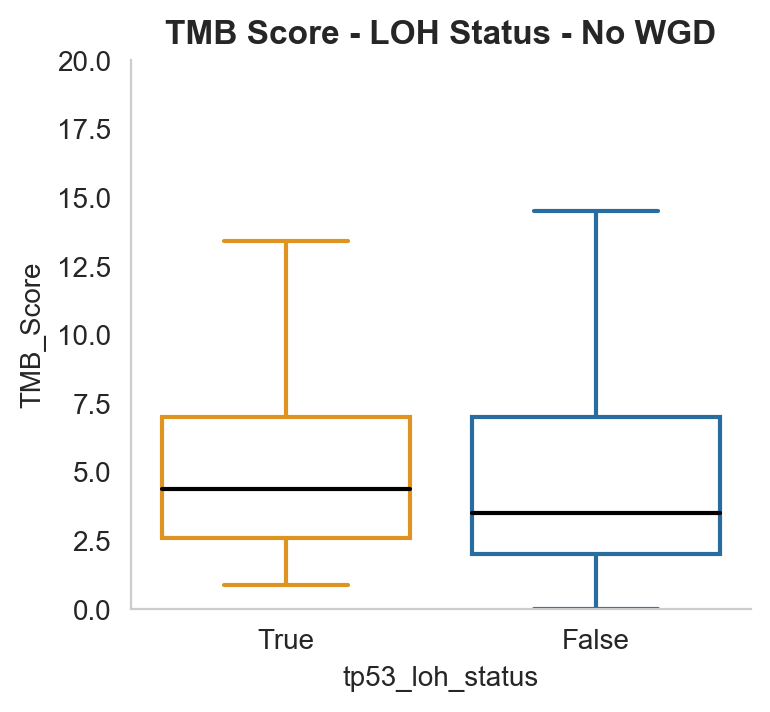

,0,1,2
0,,size,TMB_Score
1,True,6894,4.4
2,False,8621,3.5
3,,Statistics,p-value
4,,7.9259,2.26507e-15


In [114]:
fig, ax = boxplot_sampletype(df=master_no_wgd,
                  group='tp53_loh_status',
                  palette=palette_loh,
                  order=loh_list,
                  metrics='TMB_Score',
                  figsize=(4,8),
                  title='TMB Score - LOH Status - No WGD',
                  xlim=[0,20])
plt.show()

display(get_statistics(df=master_no_wgd,
               group='tp53_loh_status',
               metrics='TMB_Score', 
               group_list=[True, False]))

## TP53 Residual Groups

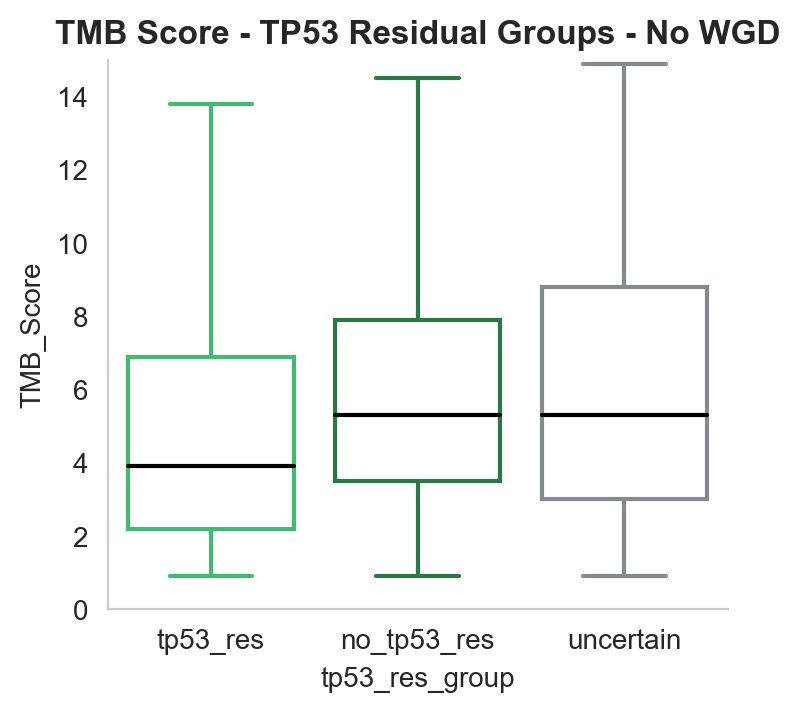

,0,1,2
0,,size,TMB_Score
1,tp53_res,3036,3.9
2,no_tp53_res,4478,5.3
3,,Statistics,p-value
4,,-14.1584,1.65729e-45


In [171]:
fig, ax = boxplot_sampletype(df=master_no_wgd,
                  group='tp53_res_group',
                  palette=palette_res,
                  order=res_group_list,
                  metrics='TMB_Score',
                  figsize=(4,8),
                  title='TMB Score - TP53 Residual Groups - No WGD',
                  xlim=[0,15])
plt.show()

display(get_statistics(df=master_no_wgd,
               group='tp53_res_group',
               metrics='TMB_Score', 
               group_list=['tp53_res', 'no_tp53_res']))

## TP53 Subgroups

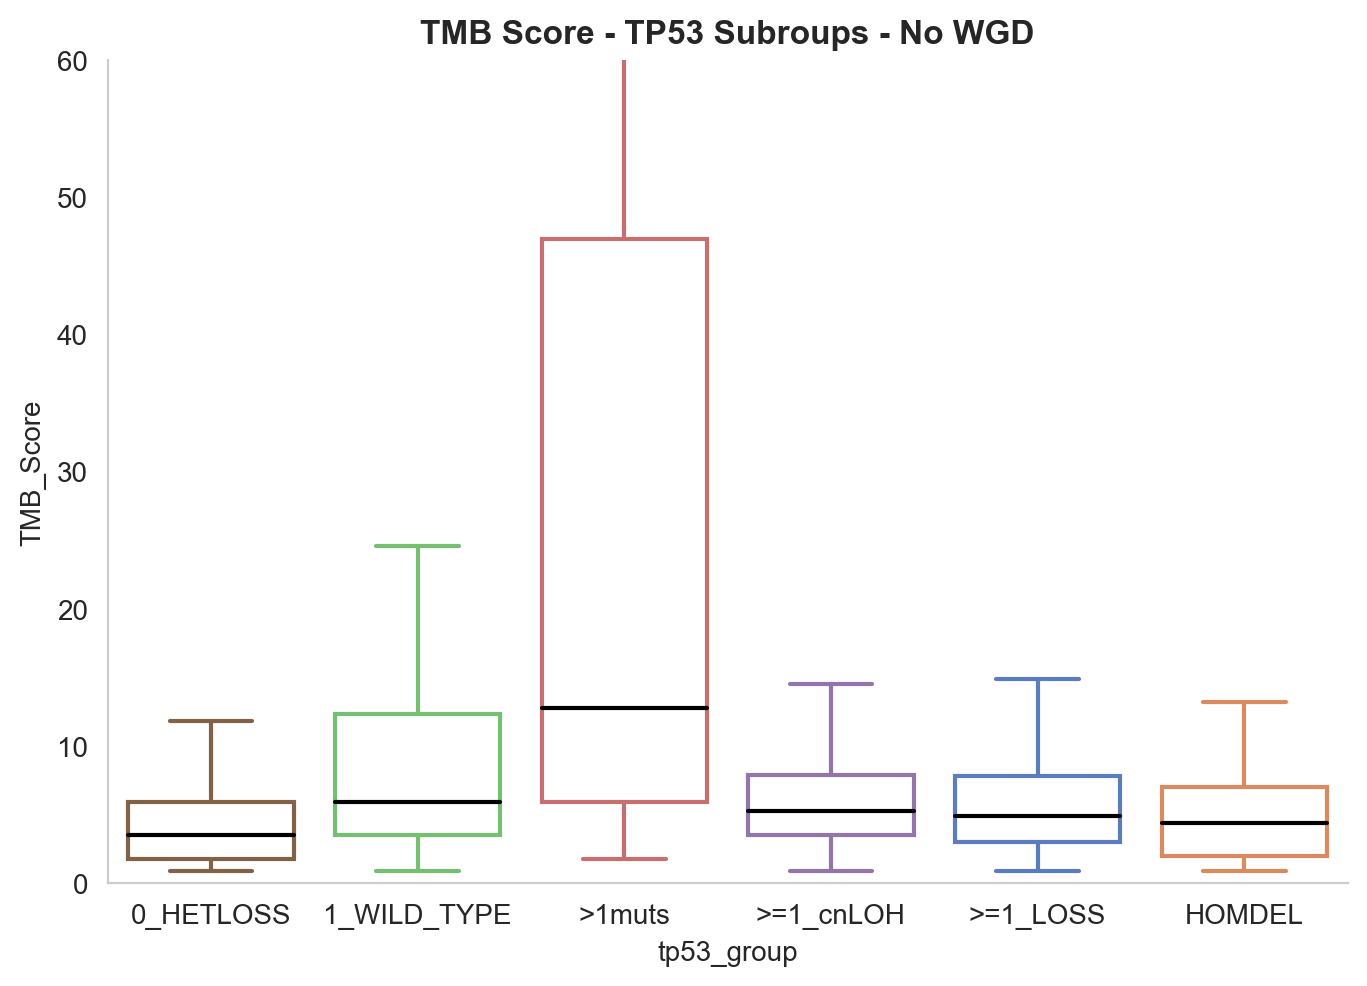

,0,1,2
0,,size,TMB_Score
1,1_WILD_TYPE,496,5.9
2,0_HETLOSS,2431,3.5
3,,Statistics,p-value
4,,13.0484,6.49116e-39
,0,1,2
0,,size,TMB_Score
1,1_WILD_TYPE,496,5.9
2,>=1_LOSS,3465,4.9
3,,Statistics,p-value


In [116]:
fig, ax = boxplot_sampletype(df=master_no_wgd,
                  group='tp53_group',
                  palette=palette,
                  order=group_list,
                  metrics='TMB_Score',
                  figsize=(8,12),
                  title='TMB Score - TP53 Subroups - No WGD',
                  xlim=[0,60])
plt.show()

display_side_by_side(get_statistics(df=master_no_wgd,
               group='tp53_group',
               metrics='TMB_Score', 
               group_list=['1_WILD_TYPE', '0_HETLOSS']),
       
       get_statistics(df=master_no_wgd,
               group='tp53_group',
               metrics='TMB_Score', 
               group_list=['1_WILD_TYPE', '>=1_LOSS']),
        
       get_statistics(df=master_no_wgd,
               group='tp53_group',
               metrics='TMB_Score', 
               group_list=['>1muts', '>=1_LOSS']))

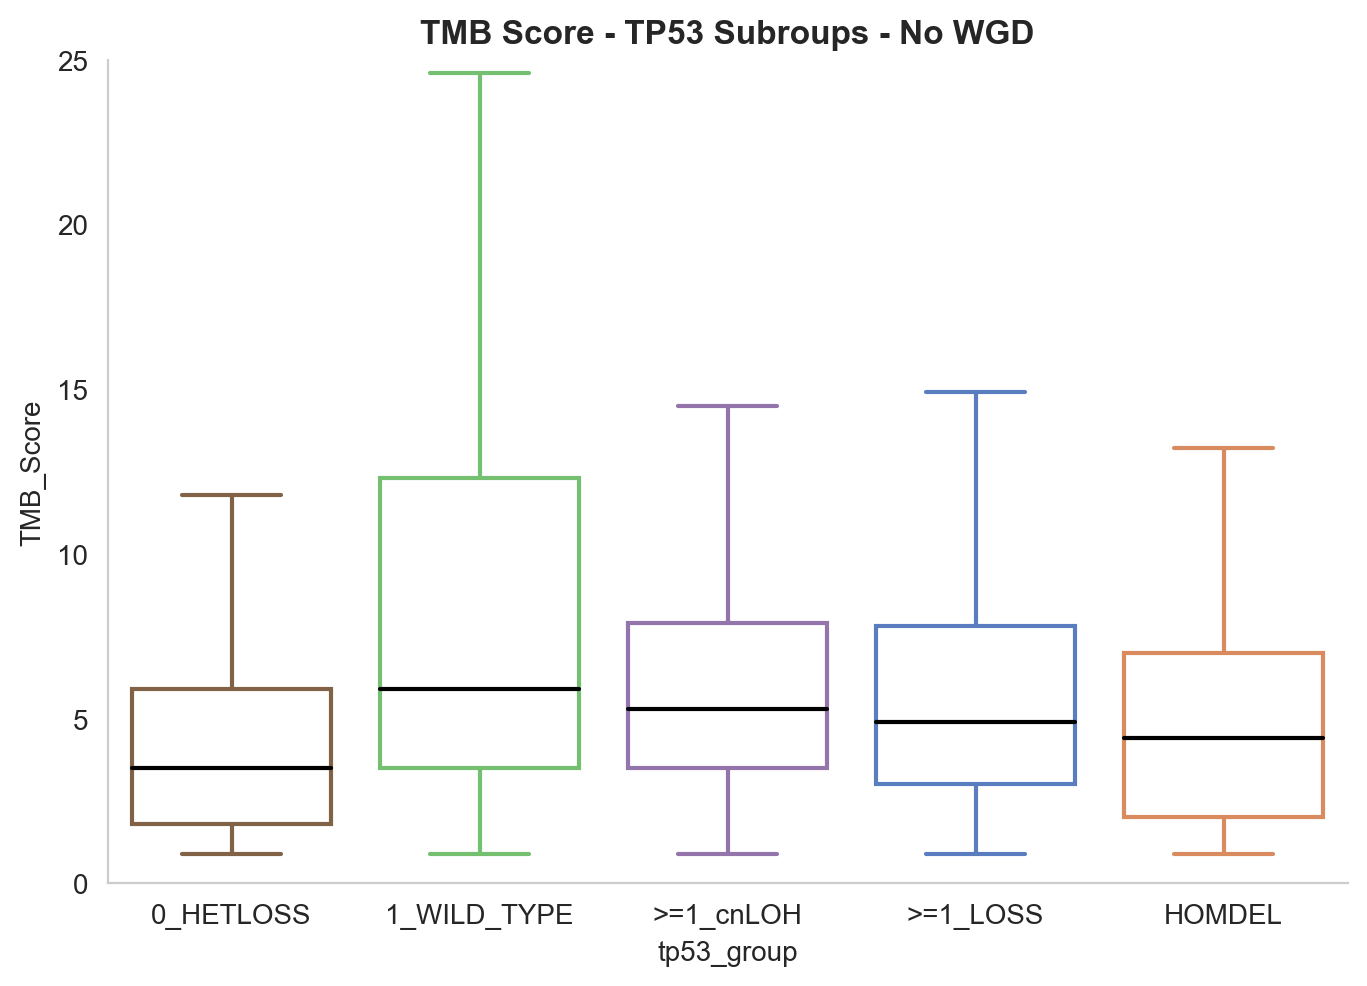

In [117]:
fig, ax = boxplot_sampletype(df=master_no_wgd[master_no_wgd['tp53_group'] != '>1muts'],
                  group='tp53_group',
                  palette={'>=1_LOSS':mc[0], 'HOMDEL':mc[1], '1_WILD_TYPE':mc[2], '>=1_cnLOH':mc[4], '0_HETLOSS':mc[5]},
                  order=['0_HETLOSS', '1_WILD_TYPE', '>=1_cnLOH', '>=1_LOSS','HOMDEL'],
                  metrics='TMB_Score',
                  figsize=(8,12),
                  title='TMB Score - TP53 Subroups - No WGD',
                  xlim=[0,25])
plt.show()

Here we can have a look at the different cancers and their average TMB_Scpre in the Non WGD Cohort.
We can thus see the hypermutator cancers.

In [199]:
master_no_wgd[['Cancer_Type', 'driver_mutation_count']].groupby(['Cancer_Type'])[['driver_mutation_count']].median().sort_values(by='driver_mutation_count', ascending=False).head(30)

,driver_mutation_count
Cancer_Type,
Endometrial Cancer,6.0
Small Bowel Cancer,5.0
Bladder Cancer,5.0
Tubular Adenoma of the Colon,5.0
"Skin Cancer, Non-Melanoma",4.5
Penile Cancer,4.0
Colorectal Cancer,4.0
Vaginal Cancer,3.5
Gastrointestinal Neuroendocrine Tumors of the Esophagus/Stomach,3.0


## PanCancer TMB Plot

In [119]:
# Filter and order the samples in order to plot with decreasing medians on the cnloh subgroup
cancer_count = get_groupby(master_no_wgd[~master_no_wgd['tp53_group'].isna()], 'Cancer_Type', 'count').sort_values(by='count', ascending = False)
cancer_list = list(cancer_count[cancer_count['count']>=70].index.values)

master_list = master_no_wgd[master_no_wgd['Cancer_Type'].isin(cancer_list)]
master_list_cnloh = master_list[master_list['tp53_group'] == '1_WILD_TYPE']
cancer_order = master_list_cnloh.groupby('Cancer_Type')['TMB_Score']\
                                .apply(np.median)\
                                .sort_values(ascending=True)\
                                .index\
                                .tolist()
samples_list_ordered=[]
for cancer in cancer_order:
    samples_list_ordered = samples_list_ordered + master_list[master_list['Cancer_Type'] == cancer].index.tolist()
#samples_list_ordered

master_ordered = master_list.reindex(samples_list_ordered)

In [120]:
metrics = 'TMB_Score'
ylim = 1000

CPU times: user 1min 23s, sys: 8.08 s, total: 1min 31s
Wall time: 30.9 s


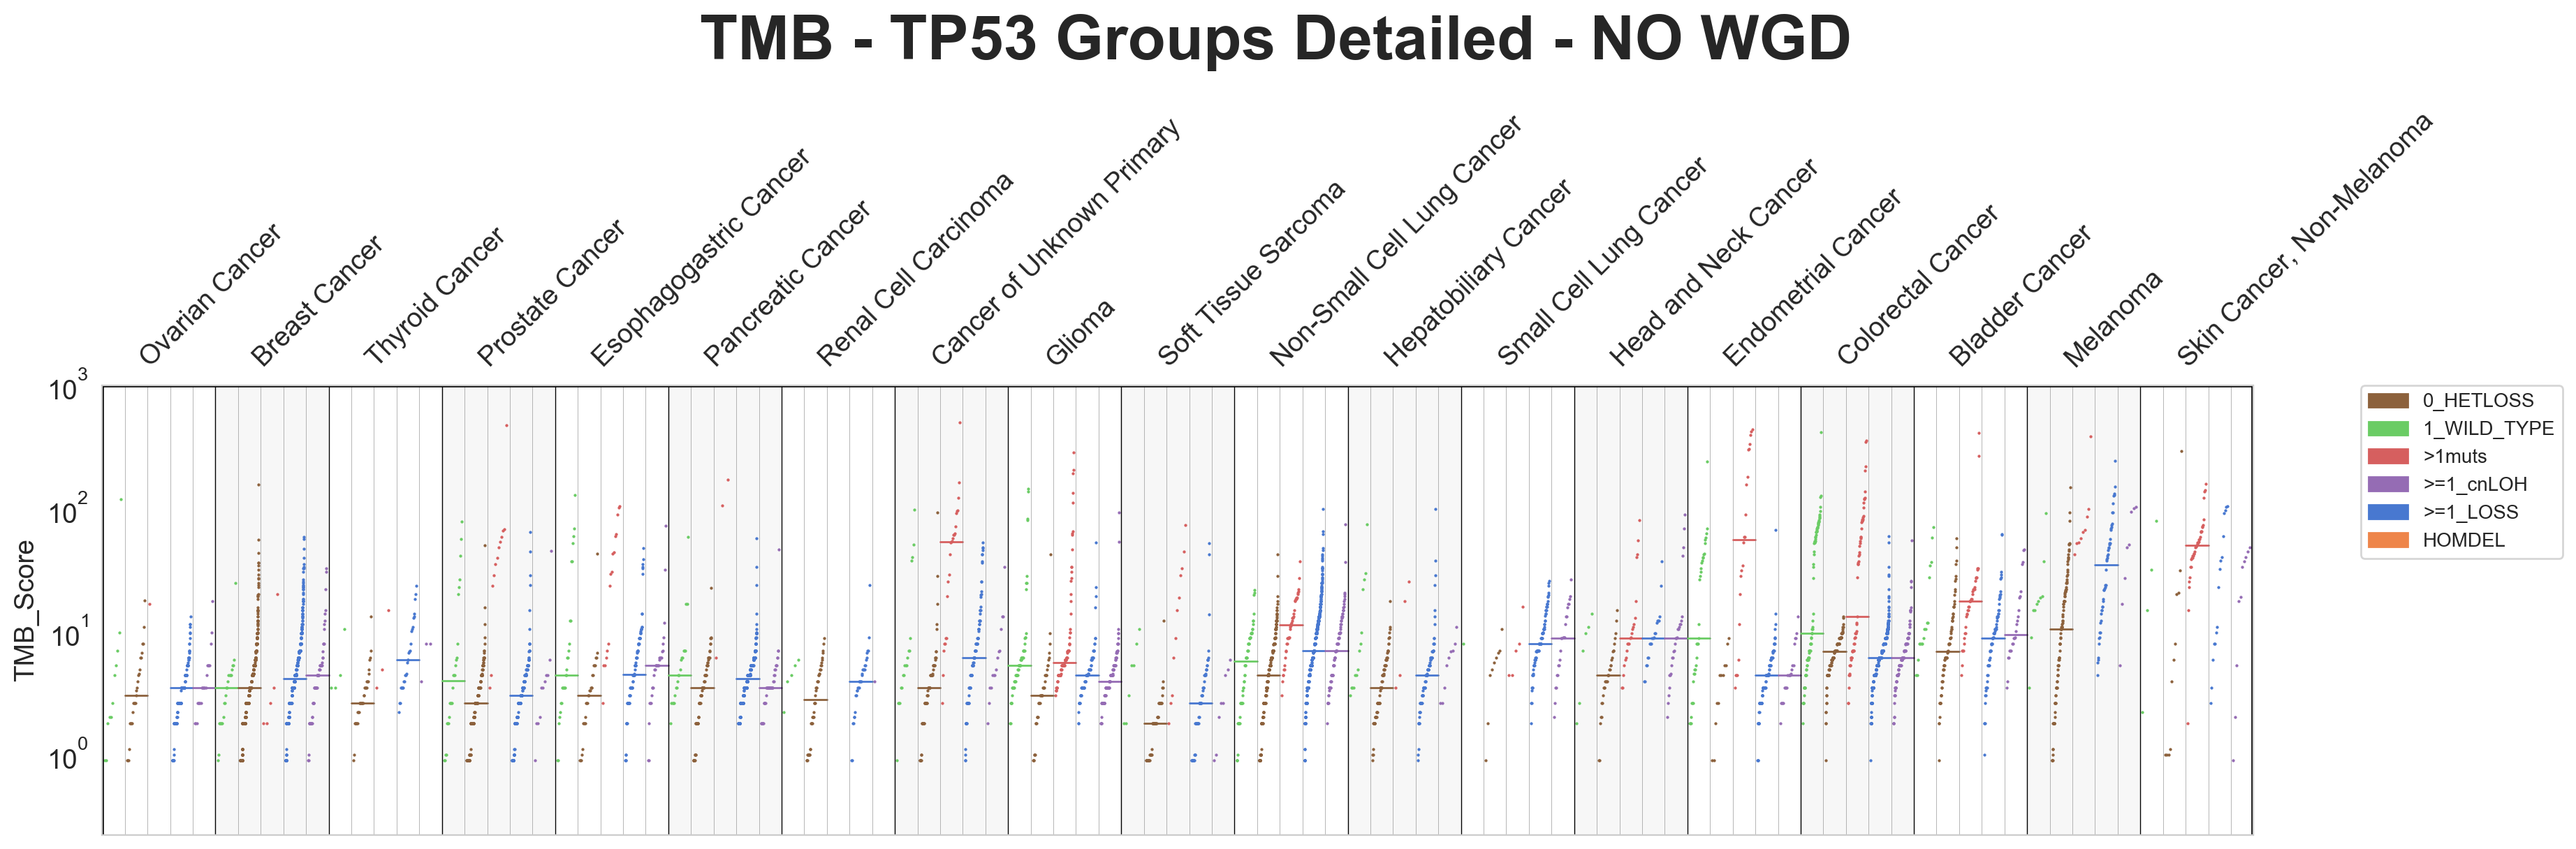

In [121]:
%%time
# Let's begin with. one subgroup : >=1_cnLOH
sns.set_style("whitegrid", {'grid.color': '1.'})

fig = plt.figure(figsize=(20,7))
ax = plt.subplot2grid(shape=(1,1), loc=(0,0), colspan=1)

import itertools
col = itertools.cycle(["#FFFFFF","#FFFFFF","#FFFFFF","#FFFFFF","#FFFFFF","#F7F7F7","#F7F7F7","#F7F7F7","#F7F7F7","#F7F7F7"])
labels = []

#order = medians.sort_values(ascending=False)
for i, (group, df) in enumerate(master_ordered.groupby(by="Cancer_Type", sort=False)):
    i = 5*i
    labels.append(group)
    
    # 1_WILD_TYPE Subgroup in GREEN
    
    df_mono = df[df['tp53_group'] =='1_WILD_TYPE']
    totalsamples_mono = df_mono.shape[0]
    df_mono = df_mono.sort_values(metrics)
    plt.axvspan(xmin=i-0.5,xmax=i+0.5,color=next(col),zorder=1)
    if totalsamples_mono>0:
        for j,(_,row) in enumerate(df_mono.iterrows()):
            plt.scatter(i-0.4+(j/totalsamples_mono)*0.8,row[metrics],color=palette['1_WILD_TYPE'],s=0.3,zorder=2)
        
        if df_mono.shape[0]>20:
            median_mono  = df_mono[metrics].median()
            plt.plot([i-0.5,i+0.5],[median_mono,median_mono],color=palette['1_WILD_TYPE'], linewidth=1)
    
    plt.plot([i+0.5,i+0.5],[0,ylim],color='#7F7F7F', linewidth=0.2)
    
    # 0_HETLOSS Subgroup in BROWN
    l=i+1
    df_mono = df[df['tp53_group'] =='0_HETLOSS']
    totalsamples_mono = df_mono.shape[0]
    df_mono = df_mono.sort_values(metrics)
    plt.axvspan(xmin=l-0.5,xmax=l+0.5,color=next(col),zorder=1)
    if totalsamples_mono>0:
        for j,(_,row) in enumerate(df_mono.iterrows()):
            plt.scatter(l-0.4+(j/totalsamples_mono)*0.8,row[metrics],color=palette['0_HETLOSS'],s=0.3,zorder=2)
        
        if df_mono.shape[0]>20:
            median_mono  = df_mono[metrics].median()
            plt.plot([l-0.5,l+0.5],[median_mono,median_mono],color=palette['0_HETLOSS'], linewidth=1)
    
    plt.plot([l+0.5,l+0.5],[0,ylim],color='#7F7F7F', linewidth=0.2)
    
    # >1muts Subgroup in RED
    k = i+2
    df_muts = df[df['tp53_group'] == '>1muts']
    totalsamples_muts = df_muts.shape[0]
    df_muts = df_muts.sort_values(metrics)
    plt.axvspan(xmin=k-0.5,xmax=k+0.5,color=next(col),zorder=1)
    if totalsamples_muts>0:
        for j,(_,row) in enumerate(df_muts.iterrows()):
            plt.scatter(k-0.4+(j/totalsamples_muts)*0.8,row[metrics],color=palette['>1muts'],s=0.3,zorder=2)
    
        if df_muts.shape[0]>20:
            median_muts  = df_muts[metrics].median()
            plt.plot([k-0.5,k+0.5],[median_muts,median_muts],color=palette['>1muts'], linewidth=1)
    
    plt.plot([k+0.5,k+0.5],[0,ylim],color='#7F7F7F', linewidth=0.2)
    
    # LOSS Subgroup in BLUE
    h = i+3
    df_loss = df[df['tp53_group']=='>=1_LOSS']
    totalsamples_loss = df_loss.shape[0]
    df_loss = df_loss.sort_values(metrics)
    plt.axvspan(xmin=h-0.5,xmax=h+0.5,color=next(col),zorder=1)
    if totalsamples_loss>0:
        for j,(_,row) in enumerate(df_loss.iterrows()):
            plt.scatter(h-0.4+(j/totalsamples_loss)*0.8,row[metrics],color=palette['>=1_LOSS'],s=0.3,zorder=2)
        
        if df_loss.shape[0]>20:
            median_loss  = df_loss[metrics].median()
            plt.plot([h-0.5,h+0.5],[median_loss,median_loss],color=palette['>=1_LOSS'], linewidth=1)
    
    plt.plot([h+0.5,h+0.5],[0,ylim],color='#7F7F7F', linewidth=0.2)
    
    # CNLOH Subgroup in PURPLE
    g = i+4
    df_cnloh = df[df['tp53_group'] == '>=1_cnLOH']
    totalsamples_cnloh = df_cnloh.shape[0]
    df_cnloh = df_cnloh.sort_values(metrics)
    plt.axvspan(xmin=g-0.5,xmax=g+0.5,color=next(col),zorder=1)
    if totalsamples_cnloh>0:
        for j,(_,row) in enumerate(df_cnloh.iterrows()):
            plt.scatter(g-0.4+(j/totalsamples_cnloh)*0.8,row[metrics],color=palette['>=1_cnLOH'],s=0.3,zorder=2)

        if df_cnloh.shape[0]>20:    
            median_cnloh  = df_cnloh[metrics].median()
            plt.plot([g-0.5,g+0.5],[median_cnloh,median_cnloh],color=palette['>=1_cnLOH'], linewidth=1)
    
    plt.plot([g+0.5,g+0.5],[0,ylim],color='black', linewidth=0.5) ##7F7F7F
  
num_dis = len(master_no_wgd[master_no_wgd['Cancer_Type'].isin(cancer_list)]["Cancer_Type"].unique())*5
real_labels = ['']*num_dis
for i,label in enumerate(labels):
    real_labels[5*i + 1] = label
    

ax.xaxis.tick_top()
plt.xticks([k for k in range(num_dis)], real_labels, rotation=45, ha="left", fontsize=14)
ax.xaxis.set_ticks_position('none')
plt.xlim(-0.5,num_dis-0.5)
plt.yscale("log")
plt.ylim(0,ylim)

# Grid
'''plt.plot([-0.5,num_dis+0.5],[0.2,0.2],color="black", linewidth=0.5, linestyle=':')
plt.plot([-0.5,num_dis+0.5],[0.4,0.4],color="black", linewidth=0.5, linestyle=':')
plt.plot([-0.5,num_dis+0.5],[0.6,0.6],color="black", linewidth=0.5, linestyle=':')
plt.plot([-0.5,num_dis+0.5],[0.8,0.8],color="black", linewidth=0.5, linestyle=':')
'''

# Border lines
plt.plot([-0.5,num_dis-0.5],[0,0],color="black", linewidth=2, linestyle='-')
plt.plot([-0.5,num_dis-0.5],[ylim,ylim],color="black", linewidth=2, linestyle='-')
plt.plot([-0.5,-0.5],[0,ylim],color="black", linewidth=2, linestyle='-')
plt.plot([num_dis-0.5,num_dis-0.5],[0,ylim],color="black", linewidth=2, linestyle='-')

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
plt.xlabel("")
plt.ylabel(metrics, fontsize=14)

palette = dict(zip(group_list, palette_list))
# Create legend handles manually
handles = [matplotlib.patches.Patch(color=palette[x], label=x) for x in palette.keys()]
# Create legend
ax.legend(handles=handles,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


fig.suptitle( 'TMB - TP53 Groups Detailed' + ' - NO WGD', fontsize=32,fontweight='bold')
fig.subplots_adjust(left=0.08, bottom=0.14, right=0.85, top=0.6, wspace=2, hspace=1)
#fig.savefig('./gi_pancancer/no_wgd/pancancer_frac_all_no_wgd.pdf' , format='pdf')

# TMB for driver genes

## NO WGD - TP53 Group Detailed

### Boxplot

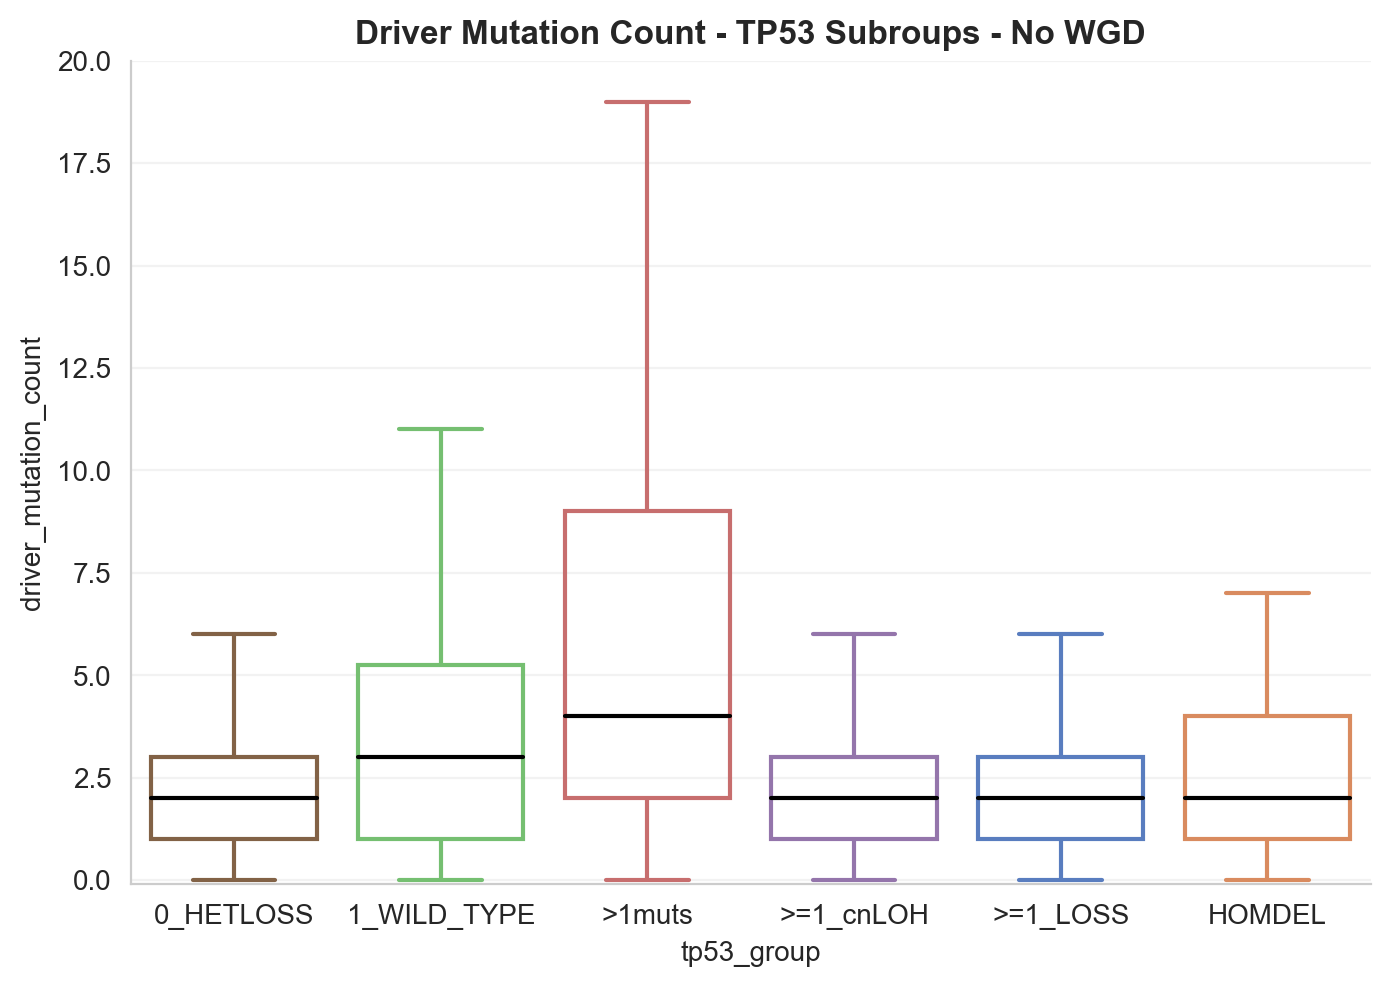

,0,1,2
0,,size,driver_mutation_count
1,1_WILD_TYPE,496,3
2,0_HETLOSS,2431,2
3,,Statistics,p-value
4,,7.80316,6.03745e-15
,0,1,2
0,,size,driver_mutation_count
1,1_WILD_TYPE,496,3
2,>=1_LOSS,3465,2
3,,Statistics,p-value


In [132]:
fig, ax = boxplot_sampletype(df=master_no_wgd,
                  group='tp53_group',
                  palette=palette,
                  order=group_list,
                  metrics='driver_mutation_count',
                  figsize=(8,12),
                  title='Driver Mutation Count - TP53 Subroups - No WGD',
                  xlim=[-0.1,20])
plt.show()

display_side_by_side(get_statistics(df=master_no_wgd,
               group='tp53_group',
               metrics='driver_mutation_count', 
               group_list=['1_WILD_TYPE', '0_HETLOSS']),
       
       get_statistics(df=master_no_wgd,
               group='tp53_group',
               metrics='driver_mutation_count', 
               group_list=['1_WILD_TYPE', '>=1_LOSS']),
        
       get_statistics(df=master_no_wgd,
               group='tp53_group',
               metrics='driver_mutation_count', 
               group_list=['>1muts', '>=1_LOSS']))

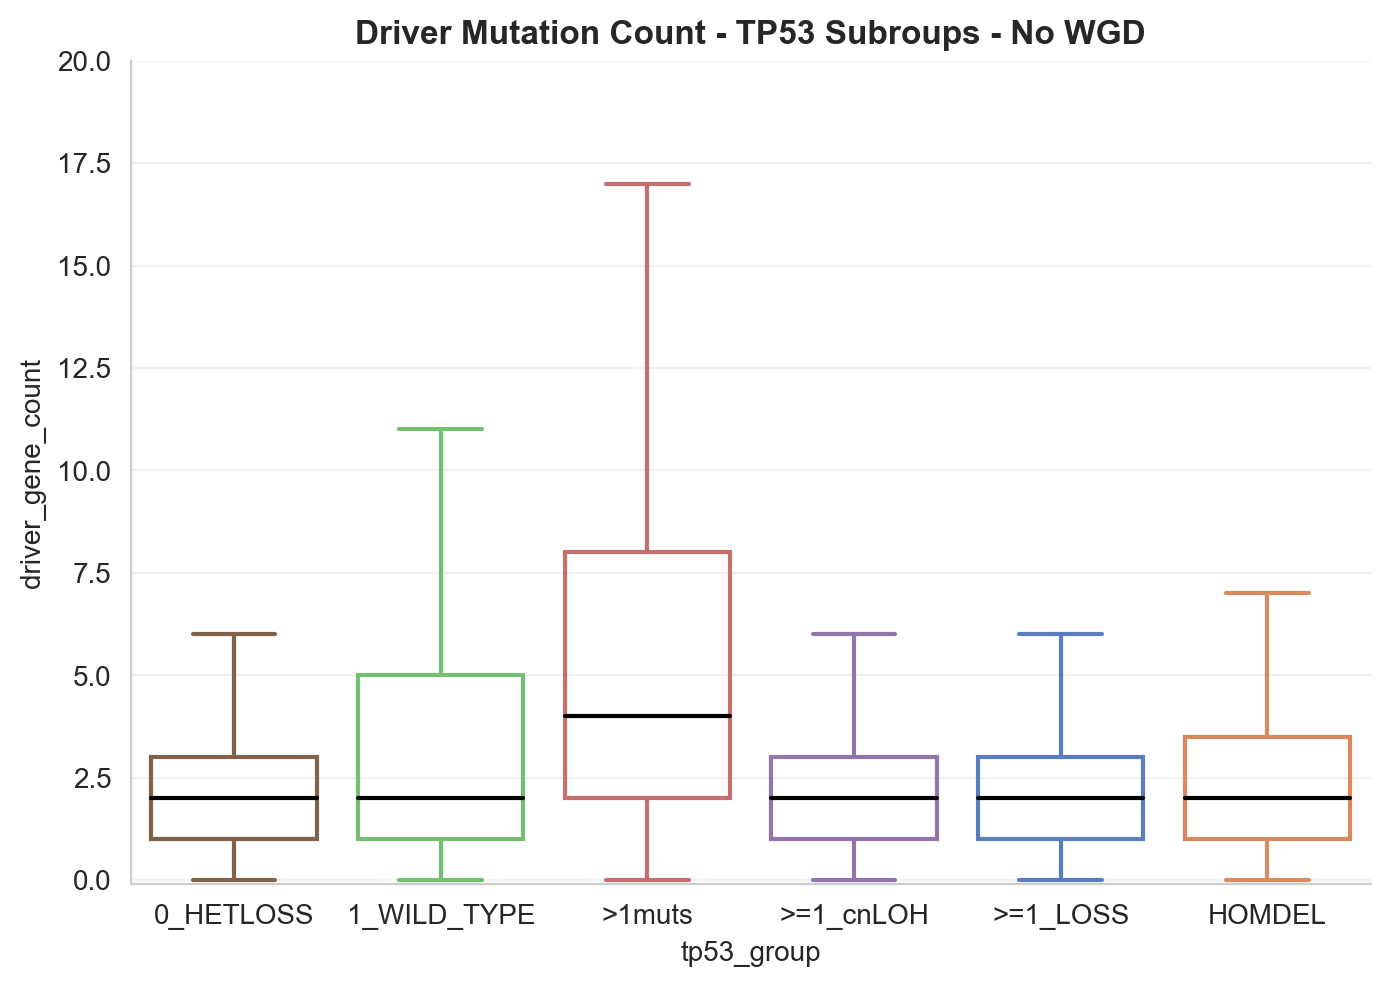

,0,1,2
0,,size,driver_gene_count
1,1_WILD_TYPE,496,2
2,0_HETLOSS,2431,2
3,,Statistics,p-value
4,,7.93116,2.17106e-15
,0,1,2
0,,size,driver_gene_count
1,1_WILD_TYPE,496,2
2,>=1_LOSS,3465,2
3,,Statistics,p-value


In [133]:
fig, ax = boxplot_sampletype(df=master_no_wgd,
                  group='tp53_group',
                  palette=palette,
                  order=group_list,
                  metrics='driver_gene_count',
                  figsize=(8,12),
                  title='Driver Mutation Count - TP53 Subroups - No WGD',
                  xlim=[-0.1,20])
plt.show()

display_side_by_side(get_statistics(df=master_no_wgd,
               group='tp53_group',
               metrics='driver_gene_count', 
               group_list=['1_WILD_TYPE', '0_HETLOSS']),
       
       get_statistics(df=master_no_wgd,
               group='tp53_group',
               metrics='driver_gene_count', 
               group_list=['1_WILD_TYPE', '>=1_LOSS']),
        
       get_statistics(df=master_no_wgd,
               group='tp53_group',
               metrics='driver_gene_count', 
               group_list=['>1muts', '>=1_LOSS']))

### Pan Cancer Plot

In [143]:
metrics = 'driver_mutation_count'
ylim = 30

In [144]:
# Filter and order the samples in order to plot with decreasing medians on the cnloh subgroup
cancer_count = get_groupby(master_no_wgd[~master_no_wgd['tp53_group'].isna()], 'Cancer_Type', 'count').sort_values(by='count', ascending = False)
cancer_list = list(cancer_count[cancer_count['count']>=70].index.values)

master_list = master_no_wgd[master_no_wgd['Cancer_Type'].isin(cancer_list)]
master_list_cnloh = master_list[master_list['tp53_group'] == '1_WILD_TYPE']
cancer_order = master_list_cnloh.groupby('Cancer_Type')[metrics]\
                                .apply(np.median)\
                                .sort_values(ascending=True)\
                                .index\
                                .tolist()
samples_list_ordered=[]
for cancer in cancer_order:
    samples_list_ordered = samples_list_ordered + master_list[master_list['Cancer_Type'] == cancer].index.tolist()
#samples_list_ordered

master_ordered = master_list.reindex(samples_list_ordered)

CPU times: user 1.38 s, sys: 129 ms, total: 1.51 s
Wall time: 520 ms


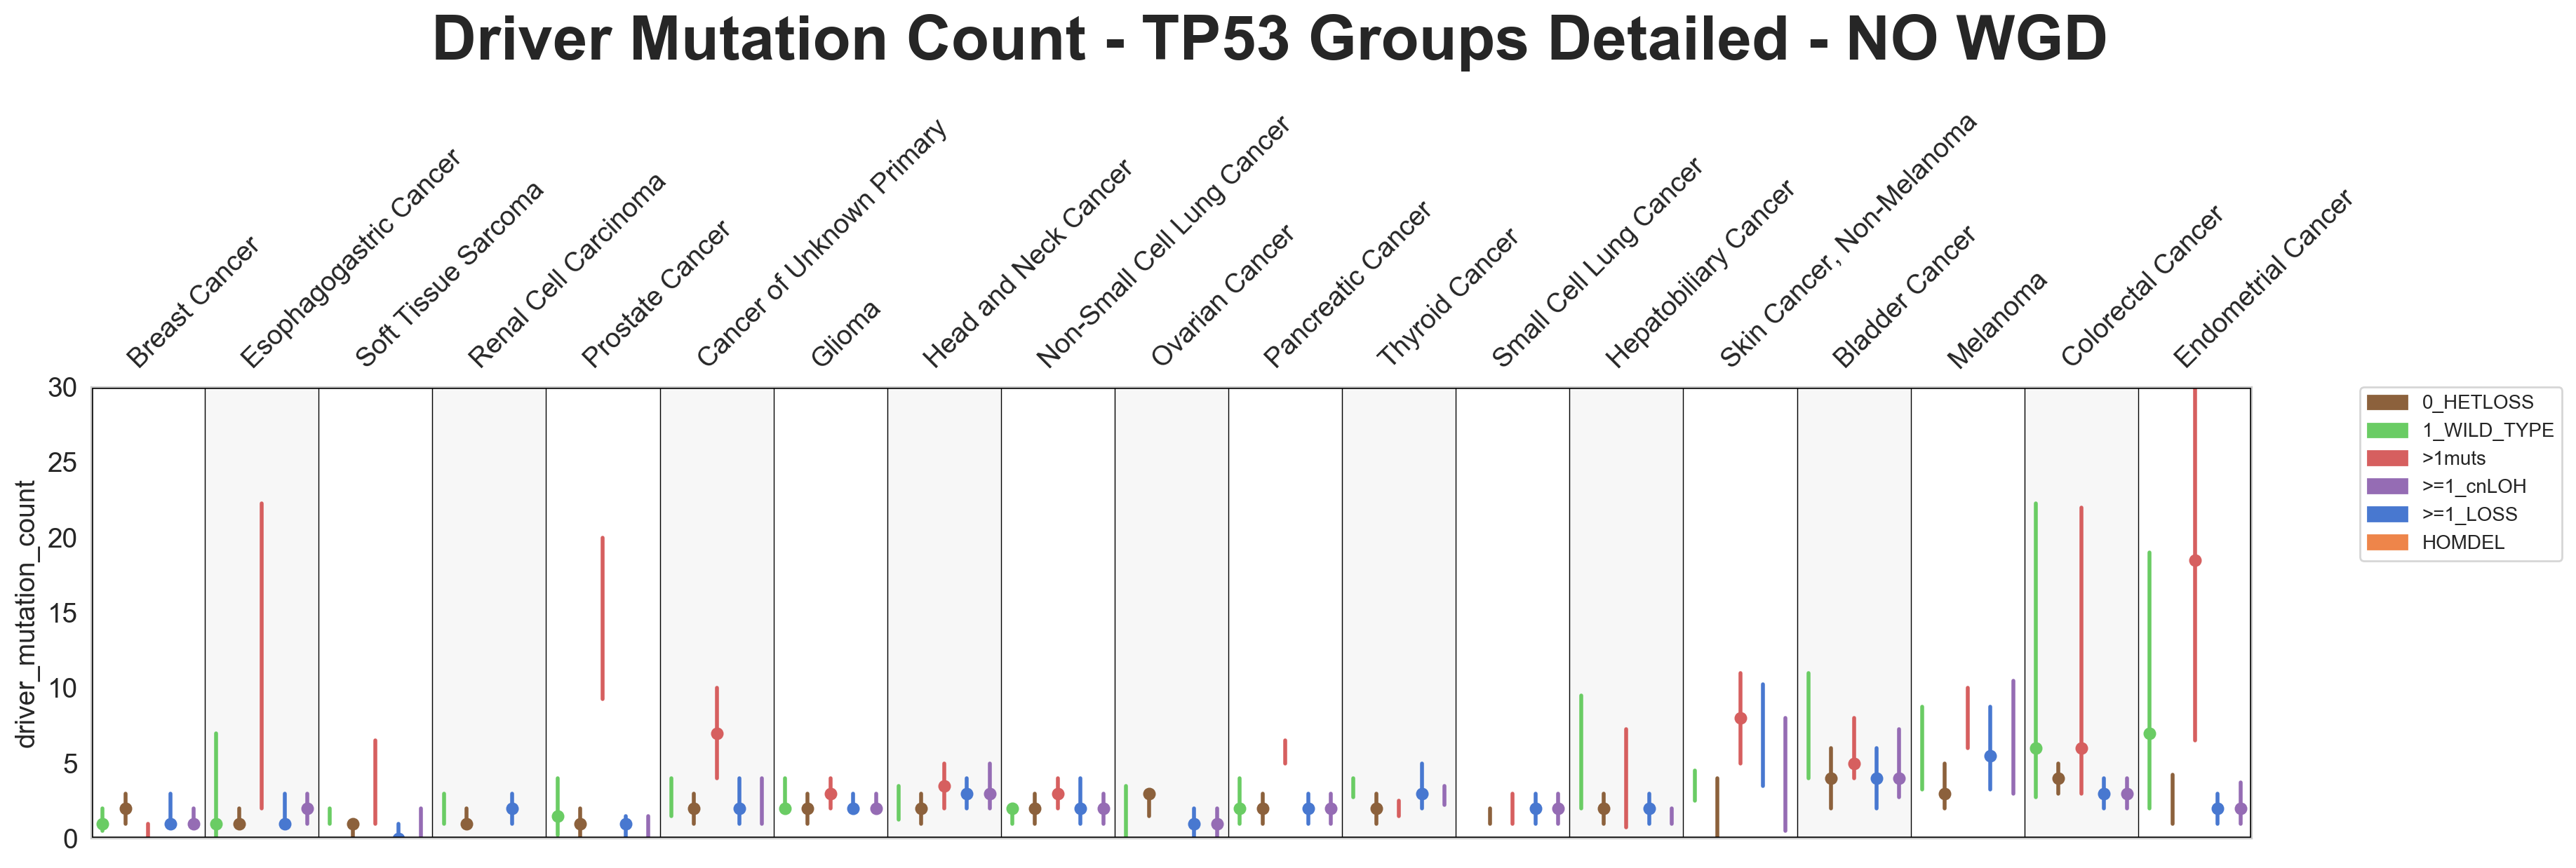

In [145]:
%%time
# Let's begin with. one subgroup : >=1_cnLOH
sns.set_style("whitegrid", {'grid.color': '1.'})

fig = plt.figure(figsize=(20,7))
ax = plt.subplot2grid(shape=(1,1), loc=(0,0), colspan=1)

import itertools
col = itertools.cycle(["#FFFFFF","#FFFFFF","#FFFFFF","#FFFFFF","#FFFFFF","#F7F7F7","#F7F7F7","#F7F7F7","#F7F7F7","#F7F7F7"])
labels = []

#order = medians.sort_values(ascending=False)
for i, (group, df) in enumerate(master_ordered.groupby(by="Cancer_Type", sort=False)):
    i = 5*i
    labels.append(group)
    
    # 1_WILD_TYPE Subgroup in GREEN
    df_mono = df[df['tp53_group'] =='1_WILD_TYPE']
    totalsamples_mono = df_mono.shape[0]
    df_mono = df_mono.sort_values(metrics)
    plt.axvspan(xmin=i-0.5,xmax=i+0.5,color=next(col),zorder=1)
    if totalsamples_mono>0:
        plt.plot([i,i], [np.percentile(df_mono[metrics], 25),np.percentile(df_mono[metrics], 75)], color=palette['1_WILD_TYPE'], linewidth=2)
        if df_mono.shape[0]>20:
            median_mono  = df_mono[metrics].median()
            plt.scatter(i,median_mono,color=palette['1_WILD_TYPE'],s=30,zorder=2, marker='o')
    
    # 0_HETLOSS Subgroup in BROWN
    l=i+1
    df_mono = df[df['tp53_group'] =='0_HETLOSS']
    totalsamples_mono = df_mono.shape[0]
    plt.axvspan(xmin=l-0.5,xmax=l+0.5,color=next(col),zorder=1)
    if totalsamples_mono>0:
        plt.plot([l,l], [np.percentile(df_mono[metrics], 25),np.percentile(df_mono[metrics], 75)], color=palette['0_HETLOSS'], linewidth=2)
        if df_mono.shape[0]>20:
            median_mono  = df_mono[metrics].median()
            plt.scatter(l,median_mono,color=palette['0_HETLOSS'],s=30,zorder=2, marker='o')
    
    #plt.plot([i+0.5,i+0.5],[0,1],color='#7F7F7F', linewidth=0.2)
    
    
    #plt.plot([l+0.5,l+0.5],[0,1],color='#7F7F7F', linewidth=0.2)
    
    # >1muts Subgroup in RED
    k = i+2
    df_muts = df[df['tp53_group'] == '>1muts']
    totalsamples_muts = df_muts.shape[0]
    df_muts = df_muts.sort_values(metrics)
    plt.axvspan(xmin=k-0.5,xmax=k+0.5,color=next(col),zorder=1)
    if totalsamples_muts>0:
        plt.plot([k,k], [np.percentile(df_muts[metrics], 25),np.percentile(df_muts[metrics], 75)], color=palette['>1muts'], linewidth=2)
        if df_muts.shape[0]>20:
            median_muts  = df_muts[metrics].median()
            plt.scatter(k,median_muts,color=palette['>1muts'],s=30,zorder=2, marker='o')
    
    #plt.plot([k+0.5,k+0.5],[0,1],color='#7F7F7F', linewidth=0.2)
    
    # LOSS Subgroup in BLUE
    h = i+3
    df_loss = df[df['tp53_group']=='>=1_LOSS']
    totalsamples_loss = df_loss.shape[0]
    df_loss = df_loss.sort_values(metrics)
    plt.axvspan(xmin=h-0.5,xmax=h+0.5,color=next(col),zorder=1)
    if totalsamples_loss>0:
        plt.plot([h,h], [np.percentile(df_loss[metrics], 25),np.percentile(df_loss[metrics], 75)], color=palette['>=1_LOSS'], linewidth=2)
        if df_loss.shape[0]>20:
            median_loss  = df_loss[metrics].median()
            plt.scatter(h,median_loss,color=palette['>=1_LOSS'],s=30,zorder=2, marker='o')
        
            #plt.plot([h-0.3,h+0.3],[median_loss,median_loss],color=palette['>=1_LOSS'], linewidth=1)
    
    #plt.plot([h+0.5,h+0.5],[0,1],color='#7F7F7F', linewidth=0.2)
    
    # CNLOH Subgroup in PURPLE
    g = i+4
    df_cnloh = df[df['tp53_group'] == '>=1_cnLOH']
    totalsamples_cnloh = df_cnloh.shape[0]
    df_cnloh = df_cnloh.sort_values(metrics)
    plt.axvspan(xmin=g-0.5,xmax=g+0.5,color=next(col),zorder=1)
    if totalsamples_cnloh>0:
        plt.plot([g,g], [np.percentile(df_cnloh[metrics], 25),np.percentile(df_cnloh[metrics], 75)], color=palette['>=1_cnLOH'], linewidth=2)
        if df_cnloh.shape[0]>20:    
            median_cnloh  = df_cnloh[metrics].median()
            plt.scatter(g,median_cnloh,color=palette['>=1_cnLOH'],s=30,zorder=2, marker='o')
    
    plt.plot([g+0.5,g+0.5],[0,ylim],color='black', linewidth=0.5) ##7F7F7F
  
num_dis = len(master_ordered[master_ordered['Cancer_Type'].isin(cancer_list)]["Cancer_Type"].unique())*5
real_labels = ['']*num_dis
for i,label in enumerate(labels):
    real_labels[5*i + 1] = label
    

ax.xaxis.tick_top()
plt.xticks([k for k in range(num_dis)], real_labels, rotation=45, ha="left", fontsize=14)
ax.xaxis.set_ticks_position('none')
plt.xlim(-0.5,num_dis-0.5)
plt.ylim(0,ylim)
# Grid
'''plt.plot([-0.5,num_dis+0.5],[0.2,0.2],color="black", linewidth=0.5, linestyle=':')
plt.plot([-0.5,num_dis+0.5],[0.4,0.4],color="black", linewidth=0.5, linestyle=':')
plt.plot([-0.5,num_dis+0.5],[0.6,0.6],color="black", linewidth=0.5, linestyle=':')
plt.plot([-0.5,num_dis+0.5],[0.8,0.8],color="black", linewidth=0.5, linestyle=':')
'''

# Border lines
plt.plot([-0.5,num_dis-0.5],[0,0],color="black", linewidth=2, linestyle='-')
plt.plot([-0.5,num_dis-0.5],[ylim,ylim],color="black", linewidth=2, linestyle='-')
plt.plot([-0.5,-0.5],[0,ylim],color="black", linewidth=2, linestyle='-')
plt.plot([num_dis-0.5,num_dis-0.5],[0,ylim],color="black", linewidth=2, linestyle='-')

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
plt.xlabel("")
plt.ylabel(metrics, fontsize=14)

palette = dict(zip(group_list, palette_list))
# Create legend handles manually
handles = [matplotlib.patches.Patch(color=palette[x], label=x) for x in palette.keys()]
# Create legend
ax.legend(handles=handles,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

fig.suptitle( 'Driver Mutation Count - TP53 Groups Detailed' + ' - NO WGD', fontsize=32,fontweight='bold')
fig.subplots_adjust(left=0.08, bottom=0.14, right=0.85, top=0.6, wspace=2, hspace=1)
#fig.savefig('./gi_pancancer/no_wgd/pancancer_frac_simple_no_wgd.pdf' , format='pdf')


CPU times: user 1.84 s, sys: 193 ms, total: 2.03 s
Wall time: 908 ms


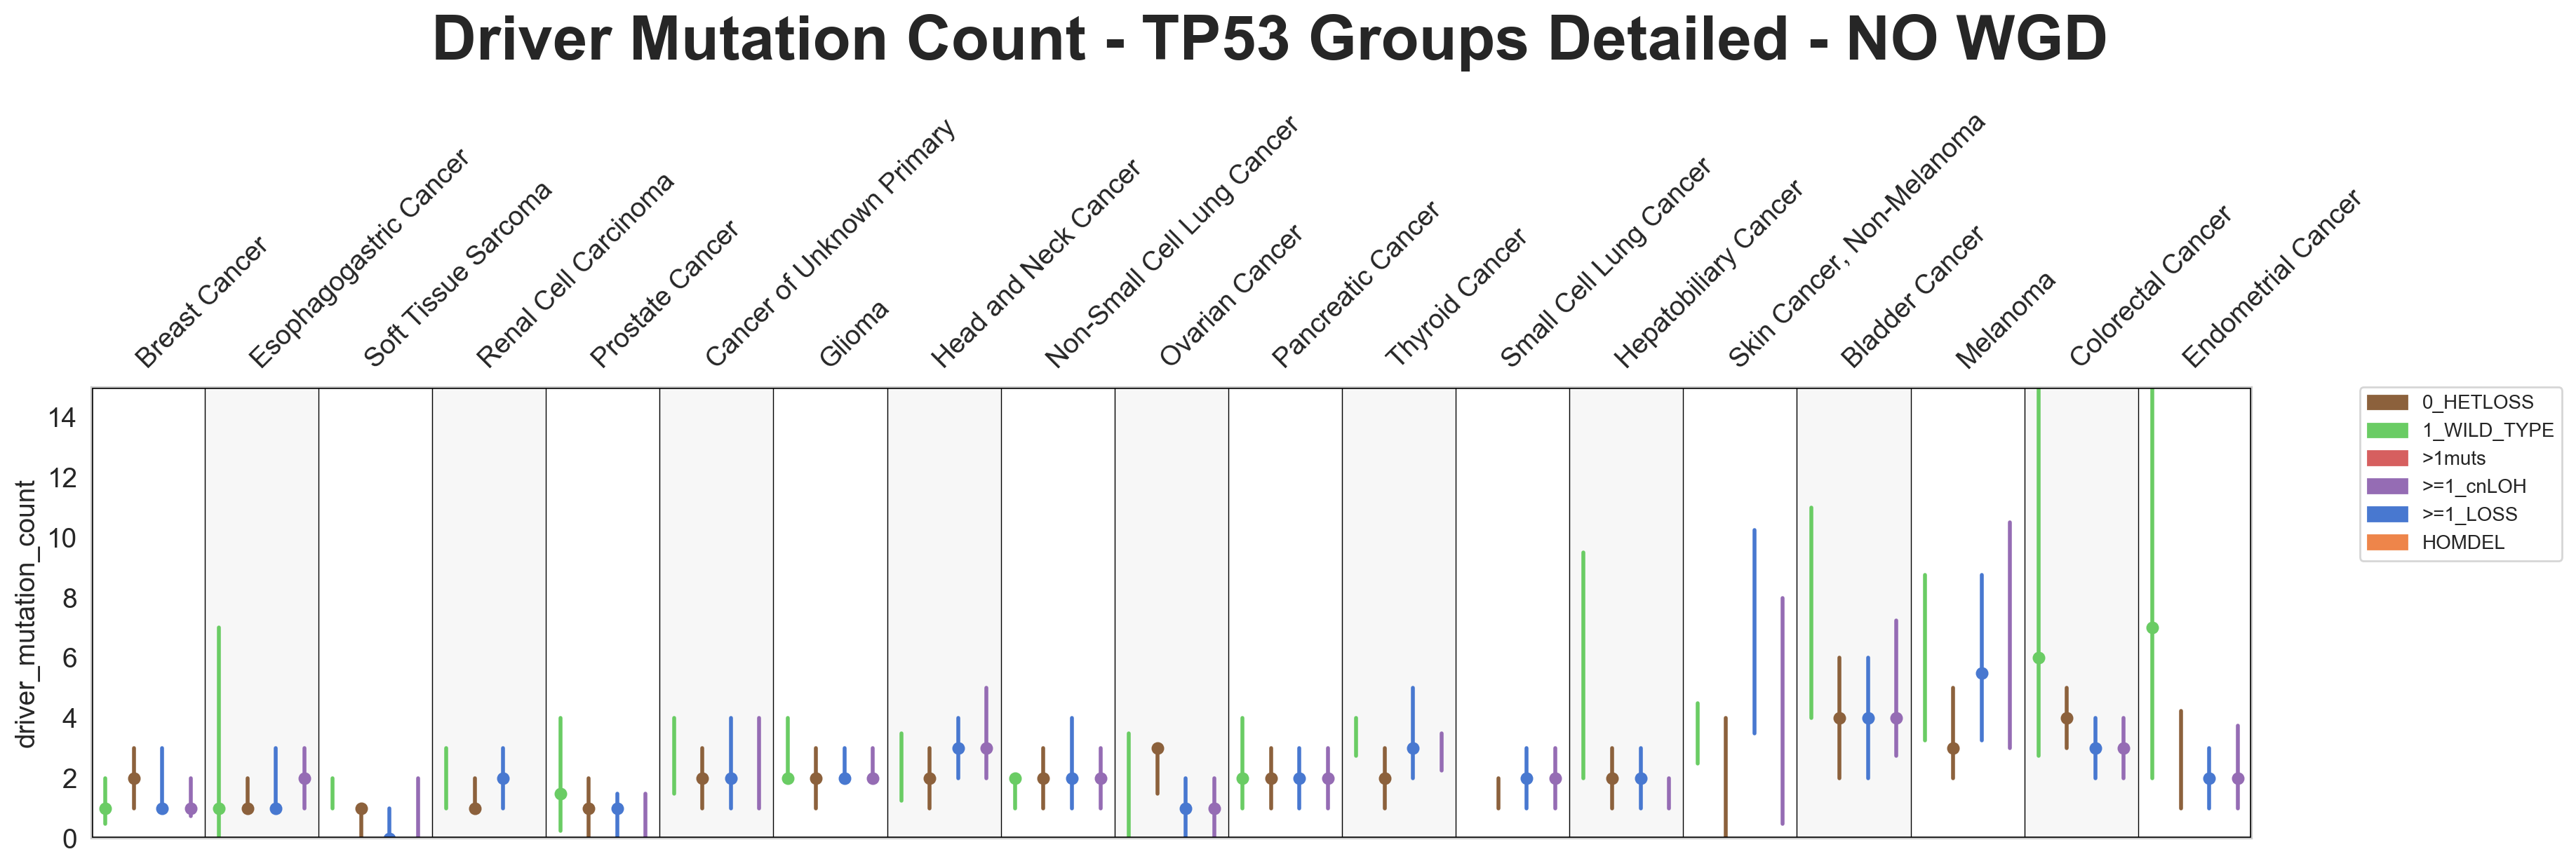

In [147]:
%%time
ylim = 15

# Let's begin with. one subgroup : >=1_cnLOH
sns.set_style("whitegrid", {'grid.color': '1.'})

fig = plt.figure(figsize=(20,7))
ax = plt.subplot2grid(shape=(1,1), loc=(0,0), colspan=1)

import itertools
col = itertools.cycle(["#FFFFFF","#FFFFFF","#FFFFFF","#FFFFFF","#F7F7F7","#F7F7F7","#F7F7F7","#F7F7F7"])
labels = []

#order = medians.sort_values(ascending=False)
for i, (group, df) in enumerate(master_ordered.groupby(by="Cancer_Type", sort=False)):
    i = 4*i
    labels.append(group)
    
    # 1_WILD_TYPE Subgroup in GREEN
    df_mono = df[df['tp53_group'] =='1_WILD_TYPE']
    totalsamples_mono = df_mono.shape[0]
    df_mono = df_mono.sort_values(metrics)
    plt.axvspan(xmin=i-0.5,xmax=i+0.5,color=next(col),zorder=1)
    if totalsamples_mono>0:
        plt.plot([i,i], [np.percentile(df_mono[metrics], 25),np.percentile(df_mono[metrics], 75)], color=palette['1_WILD_TYPE'], linewidth=2)
        if df_mono.shape[0]>20:
            median_mono  = df_mono[metrics].median()
            plt.scatter(i,median_mono,color=palette['1_WILD_TYPE'],s=30,zorder=2, marker='o')
    
    # 0_HETLOSS Subgroup in BROWN
    l=i+1
    df_mono = df[df['tp53_group'] =='0_HETLOSS']
    totalsamples_mono = df_mono.shape[0]
    plt.axvspan(xmin=l-0.5,xmax=l+0.5,color=next(col),zorder=1)
    if totalsamples_mono>0:
        plt.plot([l,l], [np.percentile(df_mono[metrics], 25),np.percentile(df_mono[metrics], 75)], color=palette['0_HETLOSS'], linewidth=2)
        if df_mono.shape[0]>20:
            median_mono  = df_mono[metrics].median()
            plt.scatter(l,median_mono,color=palette['0_HETLOSS'],s=30,zorder=2, marker='o')
    
    #plt.plot([i+0.5,i+0.5],[0,1],color='#7F7F7F', linewidth=0.2)
    
    
    #plt.plot([l+0.5,l+0.5],[0,1],color='#7F7F7F', linewidth=0.2)
    
    #plt.plot([k+0.5,k+0.5],[0,1],color='#7F7F7F', linewidth=0.2)
    
    # LOSS Subgroup in BLUE
    h = i+2
    df_loss = df[df['tp53_group']=='>=1_LOSS']
    totalsamples_loss = df_loss.shape[0]
    df_loss = df_loss.sort_values(metrics)
    plt.axvspan(xmin=h-0.5,xmax=h+0.5,color=next(col),zorder=1)
    if totalsamples_loss>0:
        plt.plot([h,h], [np.percentile(df_loss[metrics], 25),np.percentile(df_loss[metrics], 75)], color=palette['>=1_LOSS'], linewidth=2)
        if df_loss.shape[0]>20:
            median_loss  = df_loss[metrics].median()
            plt.scatter(h,median_loss,color=palette['>=1_LOSS'],s=30,zorder=2, marker='o')
        
            #plt.plot([h-0.3,h+0.3],[median_loss,median_loss],color=palette['>=1_LOSS'], linewidth=1)
    
    #plt.plot([h+0.5,h+0.5],[0,1],color='#7F7F7F', linewidth=0.2)
    
    # CNLOH Subgroup in PURPLE
    g = i+3
    df_cnloh = df[df['tp53_group'] == '>=1_cnLOH']
    totalsamples_cnloh = df_cnloh.shape[0]
    df_cnloh = df_cnloh.sort_values(metrics)
    plt.axvspan(xmin=g-0.5,xmax=g+0.5,color=next(col),zorder=1)
    if totalsamples_cnloh>0:
        plt.plot([g,g], [np.percentile(df_cnloh[metrics], 25),np.percentile(df_cnloh[metrics], 75)], color=palette['>=1_cnLOH'], linewidth=2)
        if df_cnloh.shape[0]>20:    
            median_cnloh  = df_cnloh[metrics].median()
            plt.scatter(g,median_cnloh,color=palette['>=1_cnLOH'],s=30,zorder=2, marker='o')
    
    plt.plot([g+0.5,g+0.5],[0,ylim],color='black', linewidth=0.5) ##7F7F7F
  
num_dis = len(master_ordered[master_ordered['Cancer_Type'].isin(cancer_list)]["Cancer_Type"].unique())*4
real_labels = ['']*num_dis
for i,label in enumerate(labels):
    real_labels[4*i + 1] = label
    

ax.xaxis.tick_top()
plt.xticks([k for k in range(num_dis)], real_labels, rotation=45, ha="left", fontsize=14)
ax.xaxis.set_ticks_position('none')
plt.xlim(-0.5,num_dis-0.5)
plt.ylim(0,ylim)
# Grid
'''plt.plot([-0.5,num_dis+0.5],[0.2,0.2],color="black", linewidth=0.5, linestyle=':')
plt.plot([-0.5,num_dis+0.5],[0.4,0.4],color="black", linewidth=0.5, linestyle=':')
plt.plot([-0.5,num_dis+0.5],[0.6,0.6],color="black", linewidth=0.5, linestyle=':')
plt.plot([-0.5,num_dis+0.5],[0.8,0.8],color="black", linewidth=0.5, linestyle=':')
'''

# Border lines
plt.plot([-0.5,num_dis-0.5],[0,0],color="black", linewidth=2, linestyle='-')
plt.plot([-0.5,num_dis-0.5],[ylim,ylim],color="black", linewidth=2, linestyle='-')
plt.plot([-0.5,-0.5],[0,ylim],color="black", linewidth=2, linestyle='-')
plt.plot([num_dis-0.5,num_dis-0.5],[0,ylim],color="black", linewidth=2, linestyle='-')

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
plt.xlabel("")
plt.ylabel(metrics, fontsize=14)

palette = dict(zip(group_list, palette_list))
# Create legend handles manually
handles = [matplotlib.patches.Patch(color=palette[x], label=x) for x in palette.keys()]
# Create legend
ax.legend(handles=handles,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

fig.suptitle( 'Driver Mutation Count - TP53 Groups Detailed' + ' - NO WGD', fontsize=32,fontweight='bold')
fig.subplots_adjust(left=0.08, bottom=0.14, right=0.85, top=0.6, wspace=2, hspace=1)
#fig.savefig('./gi_pancancer/no_wgd/pancancer_frac_simple_no_wgd.pdf' , format='pdf')


## WGD - Pre WGD Allelic State

### Boxplot

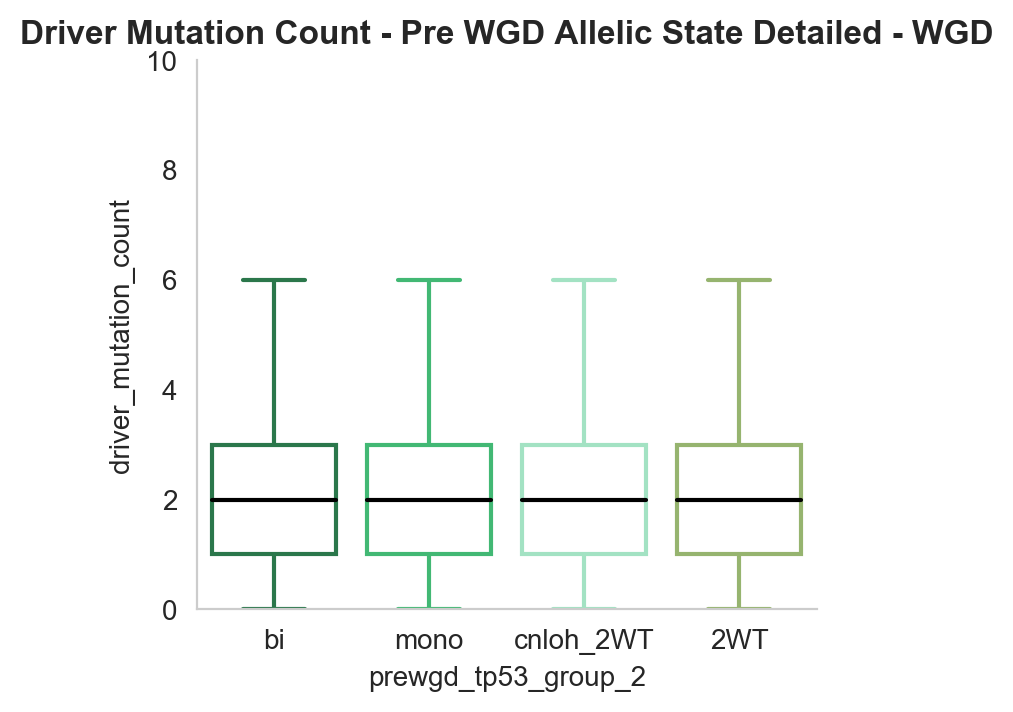

,0,1,2
0,,size,driver_mutation_count
1,bi,3289,2
2,mono,832,2
3,,Statistics,p-value
4,,-0.329203,0.742003
,0,1,2
0,,size,driver_mutation_count
1,mono,832,2
2,2WT,1306,2
3,,Statistics,p-value


In [150]:
fig, ax = boxplot_sampletype(df=master_wgd,
                  group='prewgd_tp53_group_2',
                  palette=palette_state,
                  order=state_list,
                  metrics='driver_mutation_count',
                  figsize=(4,8),
                  title='Driver Mutation Count - Pre WGD Allelic State Detailed - WGD',
                  xlim=[0,10])
plt.show()

display_side_by_side(get_statistics(df=master_wgd,
               group='prewgd_tp53_group_2',
               metrics='driver_mutation_count', 
               group_list=['bi', 'mono']),
                    
                    get_statistics(df=master_wgd,
               group='prewgd_tp53_group_2',
               metrics='driver_mutation_count', 
               group_list=['mono', '2WT']))

### Pan Cancer Plot

In [168]:
metrics = 'driver_mutation_count'
ylim = 8

In [169]:
# Filter and order the samples in order to plot with decreasing medians on the cnloh subgroup
cancer_count = get_groupby(master_wgd, 'Cancer_Type', 'count').sort_values(by='count', ascending = False)
cancer_list = list(cancer_count[cancer_count['count']>=50].index.values)

master_list = master_wgd[master_wgd['Cancer_Type'].isin(cancer_list)]
master_list_cnloh = master_list[master_list['prewgd_tp53_group_2'] == 'bi']
cancer_order = master_list_cnloh.groupby('Cancer_Type')[metrics]\
                                .apply(np.median)\
                                .sort_values(ascending=True)\
                                .index\
                                .tolist()
samples_list_ordered=[]
for cancer in cancer_order:
    samples_list_ordered = samples_list_ordered + master_list[master_list['Cancer_Type'] == cancer].index.tolist()
#samples_list_ordered

master_ordered = master_list.reindex(samples_list_ordered)

CPU times: user 1.18 s, sys: 119 ms, total: 1.3 s
Wall time: 457 ms


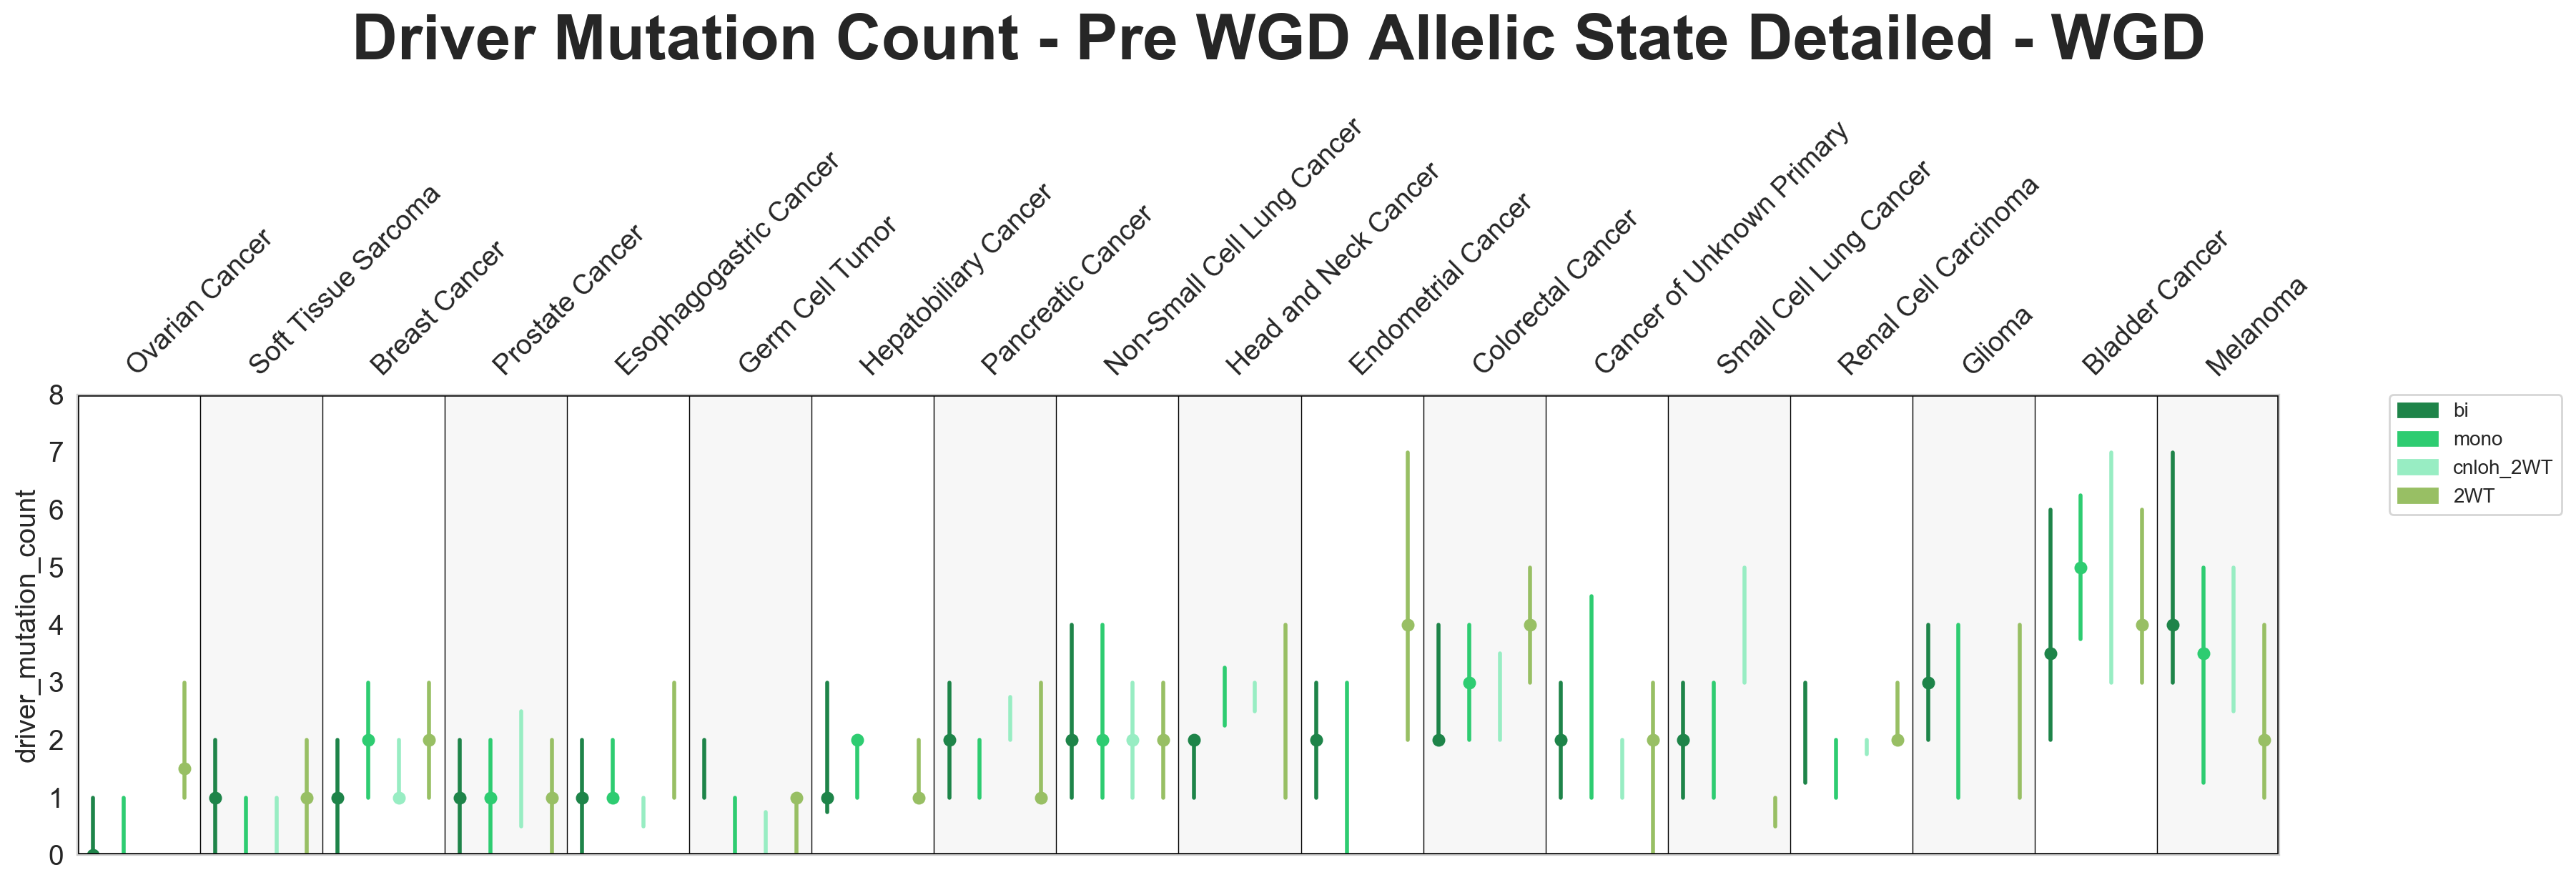

In [170]:
%%time
# Let's begin with. one subgroup : >=1_cnLOH
sns.set_style("whitegrid", {'grid.color': '1.'})

fig = plt.figure(figsize=(20,7))
ax = plt.subplot2grid(shape=(1,1), loc=(0,0), colspan=1)

import itertools
col = itertools.cycle(["#FFFFFF","#FFFFFF","#FFFFFF","#FFFFFF","#F7F7F7","#F7F7F7","#F7F7F7","#F7F7F7"])
labels = []

#order = medians.sort_values(ascending=False)
for i, (group, df) in enumerate(master_ordered.groupby(by="Cancer_Type", sort=False)):
    i = 4*i
    labels.append(group)
    
    # 1_WILD_TYPE Subgroup in GREEN
    df_mono = df[df['prewgd_tp53_group_2'] =='bi']
    totalsamples_mono = df_mono.shape[0]
    df_mono = df_mono.sort_values(metrics)
    plt.axvspan(xmin=i-0.5,xmax=i+0.5,color=next(col),zorder=1)
    if totalsamples_mono>0:
        plt.plot([i,i], [np.percentile(df_mono[metrics], 25),np.percentile(df_mono[metrics], 75)], color=palette_state['bi'], linewidth=2)
        if df_mono.shape[0]>20:
            median_mono  = df_mono[metrics].median()
            plt.scatter(i,median_mono,color=palette_state['bi'],s=30,zorder=2, marker='o')
    
    # 0_HETLOSS Subgroup in BROWN
    l=i+1
    df_mono = df[df['prewgd_tp53_group_2'] =='mono']
    totalsamples_mono = df_mono.shape[0]
    plt.axvspan(xmin=l-0.5,xmax=l+0.5,color=next(col),zorder=1)
    if totalsamples_mono>0:
        plt.plot([l,l], [np.percentile(df_mono[metrics], 25),np.percentile(df_mono[metrics], 75)], color=palette_state['mono'], linewidth=2)
        if df_mono.shape[0]>20:
            median_mono  = df_mono[metrics].median()
            plt.scatter(l,median_mono,color=palette_state['mono'],s=30,zorder=2, marker='o')
    
    #plt.plot([i+0.5,i+0.5],[0,1],color='#7F7F7F', linewidth=0.2)
    
    
    #plt.plot([l+0.5,l+0.5],[0,1],color='#7F7F7F', linewidth=0.2)
    
    #plt.plot([k+0.5,k+0.5],[0,1],color='#7F7F7F', linewidth=0.2)
    
    # LOSS Subgroup in BLUE
    h = i+2
    df_loss = df[df['prewgd_tp53_group_2']=='cnloh_2WT']
    totalsamples_loss = df_loss.shape[0]
    df_loss = df_loss.sort_values(metrics)
    plt.axvspan(xmin=h-0.5,xmax=h+0.5,color=next(col),zorder=1)
    if totalsamples_loss>0:
        plt.plot([h,h], [np.percentile(df_loss[metrics], 25),np.percentile(df_loss[metrics], 75)], color=palette_state['cnloh_2WT'], linewidth=2)
        if df_loss.shape[0]>20:
            median_loss  = df_loss[metrics].median()
            plt.scatter(h,median_loss,color=palette_state['cnloh_2WT'],s=30,zorder=2, marker='o')
        
            #plt.plot([h-0.3,h+0.3],[median_loss,median_loss],color=palette['>=1_LOSS'], linewidth=1)
    
    #plt.plot([h+0.5,h+0.5],[0,1],color='#7F7F7F', linewidth=0.2)
    
    # CNLOH Subgroup in PURPLE
    g = i+3
    df_cnloh = df[df['prewgd_tp53_group_2'] == '2WT']
    totalsamples_cnloh = df_cnloh.shape[0]
    df_cnloh = df_cnloh.sort_values(metrics)
    plt.axvspan(xmin=g-0.5,xmax=g+0.5,color=next(col),zorder=1)
    if totalsamples_cnloh>0:
        plt.plot([g,g], [np.percentile(df_cnloh[metrics], 25),np.percentile(df_cnloh[metrics], 75)], color=palette_state['2WT'], linewidth=2)
        if df_cnloh.shape[0]>20:    
            median_cnloh  = df_cnloh[metrics].median()
            plt.scatter(g,median_cnloh,color=palette_state['2WT'],s=30,zorder=2, marker='o')
    
    plt.plot([g+0.5,g+0.5],[0,ylim],color='black', linewidth=0.5) ##7F7F7F
  
num_dis = len(master_ordered[master_ordered['Cancer_Type'].isin(cancer_list)]["Cancer_Type"].unique())*4
real_labels = ['']*num_dis
for i,label in enumerate(labels):
    real_labels[4*i + 1] = label
    

ax.xaxis.tick_top()
plt.xticks([k for k in range(num_dis)], real_labels, rotation=45, ha="left", fontsize=14)
ax.xaxis.set_ticks_position('none')
plt.xlim(-0.5,num_dis-0.5)
plt.ylim(0,ylim)
# Grid
'''plt.plot([-0.5,num_dis+0.5],[0.2,0.2],color="black", linewidth=0.5, linestyle=':')
plt.plot([-0.5,num_dis+0.5],[0.4,0.4],color="black", linewidth=0.5, linestyle=':')
plt.plot([-0.5,num_dis+0.5],[0.6,0.6],color="black", linewidth=0.5, linestyle=':')
plt.plot([-0.5,num_dis+0.5],[0.8,0.8],color="black", linewidth=0.5, linestyle=':')
'''

# Border lines
plt.plot([-0.5,num_dis-0.5],[0,0],color="black", linewidth=2, linestyle='-')
plt.plot([-0.5,num_dis-0.5],[ylim,ylim],color="black", linewidth=2, linestyle='-')
plt.plot([-0.5,-0.5],[0,ylim],color="black", linewidth=2, linestyle='-')
plt.plot([num_dis-0.5,num_dis-0.5],[0,ylim],color="black", linewidth=2, linestyle='-')

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
plt.xlabel("")
plt.ylabel(metrics, fontsize=14)

palette = dict(zip(state_list, state_palette_list))
# Create legend handles manually
handles = [matplotlib.patches.Patch(color=palette[x], label=x) for x in palette.keys()]
# Create legend
ax.legend(handles=handles,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

fig.suptitle( 'Driver Mutation Count - Pre WGD Allelic State Detailed' + ' - WGD', fontsize=32,fontweight='bold')
fig.subplots_adjust(left=0.08, bottom=0.14, right=0.85, top=0.6, wspace=2, hspace=1)
#fig.savefig('./gi_pancancer/no_wgd/pancancer_frac_simple_no_wgd.pdf' , format='pdf')


In [ ]:
def get_statistics(df: pd.DataFrame, group:str, metrics: str, group_list: list):
    group_1 = df[df[group] == group_list[0]][metrics]
    group_2 = df[df[group] == group_list[1]][metrics]

    median_1 = group_1.median()
    median_2 = group_2.median()

    statistic, p_value = ranksums(group_1.dropna().values,group_2.dropna().values)
    
    results = [['', 'size', metrics],
               [group_list[0], group_1.shape[0], median_1],
               [group_list[1], group_2.shape[0], median_2],
               ['', 'Statistics', 'p-value'],
               ['', statistic, p_value]]


    return pd.DataFrame(results)

In [198]:
get_statistics(df=master_no_wgd[master_no_wgd['Sample_Type'] == 'Primary'],
               group='tp53_group',
               metrics='frac_genome_altered', 
               group_list=['>=1_cnLOH', '>=1_LOSS'])

,0,1,2
0,,size,frac_genome_altered
1,>=1_cnLOH,452,0.3195
2,>=1_LOSS,1998,0.317
3,,Statistics,p-value
4,,-0.149799,0.880923


In [202]:
get_groupby(master_no_wgd, 'tp53_vc_1', 'count')

,count
tp53_vc_1,
Frame_Shift_Del,467
Frame_Shift_Ins,193
In_Frame_Del,107
In_Frame_Ins,33
Intron,1
Missense_Mutation,3331
Nonsense_Mutation,686
Nonstop_Mutation,4
Splice_Region,1


In [203]:
master_no_wgd

,Sample_Id,Tumor_Id,Patient_Id,Cancer_Type,Cancer_Type_Detailed,Patient_Current_Age,Sample_Type,purity,ploidy,Overall_Survival_Months,Overall_Survival_Status,MSI_Score,MSI_Type,TMB_Score,tp53_key_1,tp53_vc_1,tp53_ccf_1,tp53_vaf_1,tp53_HGVSp_1,tp53_spot_1,tp53_key_2,tp53_vc_2,tp53_ccf_2,tp53_vaf_2,tp53_HGVSp_2,tp53_spot_2,tp53_key_3,tp53_vc_3,tp53_ccf_3,tp53_vaf_3,tp53_HGVSp_3,tp53_spot_3,tp53_key_4,tp53_vc_4,tp53_ccf_4,tp53_vaf_4,tp53_HGVSp_4,tp53_spot_4,tp53_key_5,tp53_vc_5,tp53_ccf_5,tp53_vaf_5,tp53_HGVSp_5,tp53_spot_5,tp53_count,tp53_tcn,tp53_mcn,tp53_lcn,tp53_seg_length,tp53_cn_state,tp53_cf,wgd,gene_count,mutation_count,driver_gene_count,driver_mutation_count,max_vaf,tp53_exp_nb_1,tp53_exp_nb_2,tp53_exp_nb_3,tp53_exp_nb_4,tp53_exp_nb_5,tp53_res_1,tp53_res_2,tp53_res_3,tp53_res_4,tp53_res_5,tp53_vc_group_1,tp53_vc_group_2,tp53_vc_group_3,tp53_vc_group_4,tp53_vc_group_5,tp53_first_group,tp53_group,tp53_res_group,tp53_loh_status,chr_affected,chr_loss,chr_gain,chr_cnloh,frac_genome_altered
0,P-0034223-T01-IM6_P-0034223-N01-IM6,P-0034223-T01-IM6,P-0034223,Breast Cancer,Invasive Breast Carcinoma,63.0,Metastasis,0.946448,2.241830,NaN,LIVING,0.55,Stable,5.3,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,0,2,1.0,1.0,80668592,DIPLOID,1.000000,False,6,6,5,5,0.901899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,WILD_TYPE,None,None,False,3.0,2.0,2.0,0.0,0.080
1,P-0009819-T01-IM5_P-0009819-N01-IM5,P-0009819-T01-IM5,P-0009819,Prostate Cancer,Prostate Adenocarcinoma,72.0,Primary,0.278140,2.681075,23.441,LIVING,0.00,Stable,1.0,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,0,2,1.0,1.0,80668300,DIPLOID,1.000000,False,1,1,0,0,0.148014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,WILD_TYPE,None,None,False,4.0,4.0,0.0,0.0,0.137
2,P-0027408-T01-IM6_P-0027408-N01-IM6,P-0027408-T01-IM6,P-0027408,Non-Small Cell Lung Cancer,Non-Small Cell Lung Cancer,67.0,Metastasis,0.275073,1.811066,22.586,LIVING,0.27,Stable,17.6,P-0027408-T01-IM6-17_7578409_CT_TC,Missense_Mutation,1.000,0.168901,p.Arg174Glu,174,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,1,1,1.0,0.0,26256025,HETLOSS,0.275073,False,17,19,4,4,0.192475,1.059141,NaN,NaN,NaN,NaN,-0.059141,NaN,NaN,NaN,NaN,missense,None,None,None,None,LOSS,>=1_LOSS,no_tp53_res,True,12.0,11.0,3.0,0.0,0.444
3,P-0006554-T01-IM5_P-0006554-N01-IM5,P-0006554-T01-IM5,P-0006554,Glioma,Anaplastic Oligodendroglioma,55.0,Primary,0.775152,1.910719,26.170,LIVING,1.30,Stable,46.2,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,0,2,1.0,1.0,40254480,DIPLOID,1.000000,False,39,47,6,6,0.706897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,WILD_TYPE,None,None,False,5.0,4.0,1.0,0.0,0.173
4,P-0036980-T01-IM6_P-0036980-N01-IM6,P-0036980-T01-IM6,P-0036980,Hepatobiliary Cancer,Intrahepatic Cholangiocarcinoma,54.0,Primary,0.845207,2.267573,9.501,LIVING,0.45,Stable,4.4,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,None,0,2,1.0,1.0,80668381,DIPLOID,1.000000,False,5,5,3,3,0.814815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,WILD_TYPE,None,None,False,4.0,4.0,1.0,0.0,0.187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16029,P-0050741-T01-IM6_P-0050741-N01-IM6,P-0050741-T01-IM6,P-0050741,Small Cell Lung Cancer,Small Cell Lung Cancer,46.0,Metastasis,0.833058,2.006039,1.

In [205]:
maf_cohort_nowgd = pd.read_csv(data_path + 'impact-facets-tp53/processed/no_wgd/' + 'maf_cohort_nowgd.txt', sep='\t').drop('Unnamed: 0', axis=1)

In [208]:
get_groupby(maf_cohort_nowgd[maf_cohort_nowgd['Hugo_Symbol'] == 'TP53'], 'Variant_Type', 'count')

,count
Variant_Type,
DEL,794
DNP,83
INS,279
ONP,2
SNP,5214
TNP,7


In [209]:
maf_cohort_nowgd

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1,Tumor_Validation_Allele2,Match_Norm_Validation_Allele1,Match_Norm_Validation_Allele2,Verification_Status,Validation_Status,Mutation_Status,Sequencing_Phase,Sequence_Source,Validation_Method,Score,BAM_File,Sequencer,Tumor_Sample_UUID,Matched_Norm_Sample_UUID,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,Exon_Number,t_depth,t_ref_count,t_alt_count,n_depth,n_ref_count,n_alt_count,all_effects,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,ALLELE_NUM,DISTANCE,STRAND_VEP,SYMBOL,SYMBOL_SOURCE,HGNC_ID,BIOTYPE,CANONICAL,CCDS,ENSP,SWISSPROT,TREMBL,UNIPARC,RefSeq,SIFT,PolyPhen,EXON,INTRON,DOMAINS,GMAF,AFR_MAF,AMR_MAF,ASN_MAF,EAS_MAF,EUR_MAF,SAS_MAF,AA_MAF,EA_MAF,CLIN_SIG,SOMATIC,PUBMED,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,IMPACT,PICK,VARIANT_CLASS,TSL,HGVS_OFFSET,PHENO,MINIMISED,ExAC_AF,ExAC_AF_AFR,ExAC_AF_AMR,ExAC_AF_EAS,ExAC_AF_FIN,ExAC_AF_NFE,ExAC_AF_OTH,ExAC_AF_SAS,GENE_PHENO,FILTER,flanking_bps,variant_id,variant_qual,ExAC_AF_Adj,ExAC_AC_AN_Adj,ExAC_AC_AN,ExAC_AC_AN_AFR,ExAC_AC_AN_AMR,ExAC_AC_AN_EAS,ExAC_AC_AN_FIN,ExAC_AC_AN_NFE,ExAC_AC_AN_OTH,ExAC_AC_AN_SAS,ExAC_FILTER,Caller,is-a-hotspot,is-a-3d-hotspot,mutation_effect,oncogenic,LEVEL_1,LEVEL_2A,LEVEL_2B,LEVEL_3A,LEVEL_3B,LEVEL_4,LEVEL_R1,LEVEL_R2,LEVEL_R3,Highest_level,citations,driver,tcn,lcn,cf,purity,t_var_freq,expected_alt_copies,ccf_Mcopies,ccf_Mcopies_lower,ccf_Mcopies_upper,ccf_Mcopies_prob95,ccf_Mcopies_prob90,ccf_1copy,ccf_1copy_lower,ccf_1copy_upper,ccf_1copy_prob95,ccf_1copy_prob90,ccf_expected_copies,ccf_expected_copies_lower,ccf_expected_copies_upper,ccf_expected_copies_prob95,ccf_expected_copies_prob90,facets_fit,reviewer_set_purity,use_only_purity_run,use_edited_cncf,cncf_file_used,mut_key,sample_mut_key
0,IKBKE,9641,MSKCC,GRCh37,1,206646650,206646650,+,Missense_Mutation,SNP,G,G,A,novel,NaN,P-0034223-T01-IM6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,SOMATIC,NaN,NaN,NaN,MSK-IMPACT,NaN,NaN,NaN,NaN,c.80G>A,p.Arg27His,p.R27H,ENST00000367120,3/22,1279.0,1027.0,252.0,809,809,0,"IKBKE,missense_variant,p.Arg27His,ENST00000367120,NM_014002.3,NM_001193322.1;IKBKE,intron_variant,,ENST00000537984,NM_001193321.1;IKBKE,intron_variant,,ENST00000463979,;",A,ENSG00000143466,ENST00000367120,Transcript,missense_variant,453/3269,80/2151,27/716,R/H,cGc/cAc,NaN,1,NaN,1,IKBKE,HGNC,14552.0,protein_coding,YES,CCDS30996.1,ENSP00000356087,Q14164,NaN,UPI0000033727,"NM_014002.3,NM_001193322.1",deleterious(0),probably_damaging(1),3/22,NaN,"Gene3D:3.30.200.20,Pfam_domain:PF00069,PROSITE_patterns:PS00107,PROSITE_profiles:PS50011,hmmpanther:PTHR22969,hmmpanther:PTHR22969:SF10,SMART_domains:SM00220,Superfamily_domains:SSF56112",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MODERATE,1.0,indel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CGC,.,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,4.0,1.0,0.946448,0.946448,0.197029,1.0,0.270,0.252,0.289,2.574074e-293,3.629664e-249,0.810,0.757,0.866,1.839065e-03,3.065910e-02,0.810,0.757,0.866,1.839065e-03,3.065910e-02,/juno/work/ccs/shared/resources/impact/facets/all/P-00342/P-0034223-T01-IM6_P-0034223-N01-IM6//default,NaN,False,False,/juno/work/ccs/shared/resources/impact/facets/all/P-00342/P-0034223-T01-IM6_P-0034223-N01-IM6//default/P-0034223-T01-IM6_P-0034223-N01-IM6_hisens.cncf.txt,1_206646650_G_A,P-0034223-T01-IM6-1_206646650_G_A
1,PIK3CA,5290,MSKCC,GRCh37,3,178936091,178936091,+,Missense_Mutation,SNP,G,G,A,novel,NaN,P-0034223-T01-IM6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,SOMATIC,NaN,NaN,NaN,MSK-IMPACT,NaN,NaN,NaN,NaN,c.1633G>A,p.Glu545Lys,p.E545K,EN